In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 20.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Grupo 2 Machine Learning/dataset/descentralizados.csv')

In [ ]:
data.head()

,Exchange,Token,Categories,Trading Pair,Market,Last Traded At,Bid/Ask Spread Percentage,Volume,Current Price (USD),Market Cap (USD),...,Price Change Percentage (24h),Price Change Percentage (7d),Price Change Percentage (14d),Price Change Percentage (30d),Price Change Percentage (60d),Price Change Percentage (200d),Price Change Percentage (1y),Trading Volume (24h),Market Cap Change (24h),Market Cap Change Percentage (24h)
0,bitfinex,SWEAT,"Gaming (GameFi), Gaming Governance Token, Gami...",USDT,Bitfinex,2024-09-21T04:36:05+00:00,0.042614%,3.557274e+06,0.00703,5.842251e+07,...,-2.62304,-1.51189,0.07785,3.62952,-8.04147,-44.34644,-5.68659,3781698.0,-1.586876e+06,-2.64438
1,bitfinex,NEAR,Artificial Intelligence (AI),USD,Bitfinex,2024-09-21T04:36:02+00:00,0.232775%,5.519771e+03,4.29000,4.751754e+09,...,-3.15829,1.11648,20.05650,1.67776,-28.70932,0.77495,276.32580,350653675.0,-1.370407e+08,-2.80316
2,bitfinex,GRT,Artificial Intelligence (AI),USDT,Bitfinex,2024-09-21T04:36:04+00:00,0.187383%,9.724509e+04,0.16003,1.529527e+09,...,0.54874,5.85712,24.16278,6.90363,-23.07234,-46.76510,74.98481,54993925.0,2.030723e+07,1.34554
3,bitfinex,MKR,RWA Protocol,USD,Bitfinex,2024-09-21T04:36:01+00:00,0.269179%,4.768594e+01,1483.35000,1.309605e+09,...,-4.95842,-9.89656,-3.28341,-26.05255,-45.46180,-29.24041,9.91304,108430349.0,-6.048618e+07,-4.41476
4,bitfinex,WIF,"Meme, GMCI Meme Index",USDT,Bitfinex,2024-09-21T04:35:20+00:00,0.179748%,7.869694e+03,1.67000,1.671990e+09,...,-8.49813,2.30317,12.45768,7.02643,-37.50812,5.28399,0.00000,523123849.0,-1.358936e+08,-7.51672


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Exchange                            3764 non-null   object 
 1   Token                               3764 non-null   object 
 2   Categories                          3764 non-null   object 
 3   Trading Pair                        3764 non-null   object 
 4   Market                              3764 non-null   object 
 5   Last Traded At                      3764 non-null   object 
 6   Bid/Ask Spread Percentage           3764 non-null   object 
 7   Volume                              3764 non-null   float64
 8   Current Price (USD)                 3764 non-null   float64
 9   Market Cap (USD)                    3764 non-null   float64
 10  Total Volume (USD)                  3764 non-null   float64
 11  High (24h, USD)                     3697 no

### Identificamos los valores nulos en el dataset

In [ ]:
data.isnull().sum()

,0
Exchange,0
Token,0
Categories,0
Trading Pair,0
Market,0
Last Traded At,0
Bid/Ask Spread Percentage,0
Volume,0
Current Price (USD),0
Market Cap (USD),0


#### Identificamos las filas con datos nulos

In [ ]:
data[data.isnull().any(axis=1)]

,Exchange,Token,Categories,Trading Pair,Market,Last Traded At,Bid/Ask Spread Percentage,Volume,Current Price (USD),Market Cap (USD),...,Price Change Percentage (24h),Price Change Percentage (7d),Price Change Percentage (14d),Price Change Percentage (30d),Price Change Percentage (60d),Price Change Percentage (200d),Price Change Percentage (1y),Trading Volume (24h),Market Cap Change (24h),Market Cap Change Percentage (24h)
2404,jupiter,gogowifcone,Meme,wrapped-solana,Jupiter,2024-09-20T07:09:32+00:00,0.000000,1.196290e+07,1.280000e-05,0.00,...,NaN,14.93371,19.21404,-28.79142,-24.66353,0.00000,0.00000,37.38,NaN,NaN
2428,jupiter,glub,Meme,wrapped-solana,Jupiter,2024-09-19T00:43:14+00:00,0.000000,8.309361e+06,1.282000e-05,10547.25,...,NaN,5.43701,7.00525,16.31291,-16.44382,0.00000,0.00000,14.89,NaN,NaN
2575,quickswap,loserchick-egg,Gaming (GameFi),bridged-usdc-polygon-pos-bridge,Quickswap,2024-09-21T07:32:59+00:00,0.693127,4.780590e+01,2.466440e-02,0.00,...,NaN,-3.14541,-2.62864,-3.96163,-6.71422,-32.74938,85.64433,1.18,NaN,NaN
2912,ston_fi,tony-mcduck,Meme,the-open-network,STON.fi,2024-09-20T06:19:52+00:00,0.648206,9.285995e+06,1.432000e-05,0.00,...,NaN,2.30364,19.48202,-11.66921,-32.47538,-59.57952,0.00000,132.97,NaN,NaN
3571,uniswap,schrodi,Meme,weth,Uniswap V2 (Ethereum),2024-09-20T21:24:20+00:00,0.617725,2.434802e+05,2.664940e-03,266494.00,...,NaN,13.31771,13.26905,4.53850,-19.93267,0.00000,0.00000,510.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,uniswap,3d3d,Meme,weth,Uniswap V2 (Ethereum),2024-09-17T23:00:20+00:00,0.649296,4.711163e+11,3.809500e-11,13731.96,...,NaN,-1.69004,-6.42069,-15.56151,-38.93780,-84.75717,-78.35301,17.95,NaN,NaN
3728,uniswap,squidgrow,Meme,weth,Uniswap V2 (Ethereum),2024-09-17T22:46:22+00:00,0.656822,2.643773e+10,4.060000e-09,0.00,...,NaN,-74.30439,-67.08717,-54.00035,-57.76048,-56.09931,-38.45106,111.23,NaN,NaN
3731,uniswap,meow-coin,Meme,weth,Uniswap V2 (Ethereum),2024-09-20T05:35:28+00:00,0.676676,6.294737e+09,1.006600e-08,0.00,...,NaN,10.38549,10.00179,-11.73442,-23.71345,0.00000,0.00000,63.36,NaN,NaN
3738,uniswap,bark,Meme,weth,Uniswap V2 (Ethereum),2024-09-16T21:34:54+00:00,0.865929,2.184682e+06,9.320000e-06,0.00,...,NaN,-8.45958,-4.58167,-22.56490,-34.30545,-83.47249,-33.27940,20.37,NaN,NaN


### Eliminamos a los tokens que tienen valor de Market Cap 0 debido a que estos tokens ya no estan en funcionamiento.

In [ ]:
data = data.drop(data[data['Market Cap (USD)'] == 0].index)

#### Debido a que tienen valores nulos en el market cap change (24h) eliminamos los valores nulos.

In [ ]:
data= data.dropna()

In [ ]:
data.isna().sum()

,0
Exchange,0
Token,0
Categories,0
Trading Pair,0
Market,0
Last Traded At,0
Bid/Ask Spread Percentage,0
Volume,0
Current Price (USD),0
Market Cap (USD),0


#### Valores None en Bid/Ask Spread Percentage

En cuando a Bid/Ask Spread Percentage, tiene filas que indican 'None%' esto se debe a que hay ciertos tokens que no mencionaban un 'Bid/Ask Spread Percentage' o el valor era muy bajo y por ello se guardaba como none.

In [ ]:
data['Bid/Ask Spread Percentage'] = data['Bid/Ask Spread Percentage'] \
                                      .replace('None%', 'NaN') \
                                      .str.replace('%', '') \
                                      .str.strip()

Para que guarden relación los datos, Bid/Ask Spread Percentage se convierte a tipo float en vez de string y los datos faltantes(none) los rellenamos con 0.

In [ ]:
data['Bid/Ask Spread Percentage'] = pd.to_numeric(data['Bid/Ask Spread Percentage'], errors='coerce')

In [ ]:
data['Bid/Ask Spread Percentage'] = data['Bid/Ask Spread Percentage'].fillna(0)

#### Utilizamos Sweetviz para poder tener una vista preliminar de los datos

                                             |          | [  0%]   00:00 -> (? left)


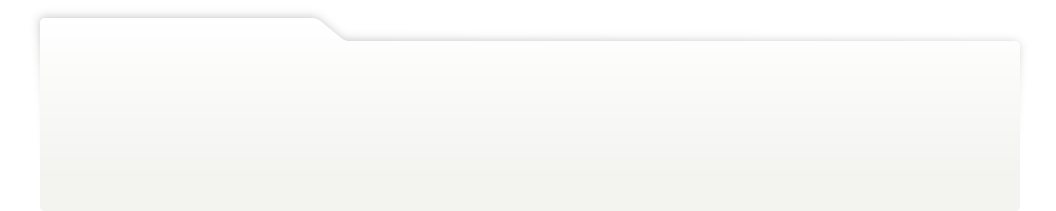
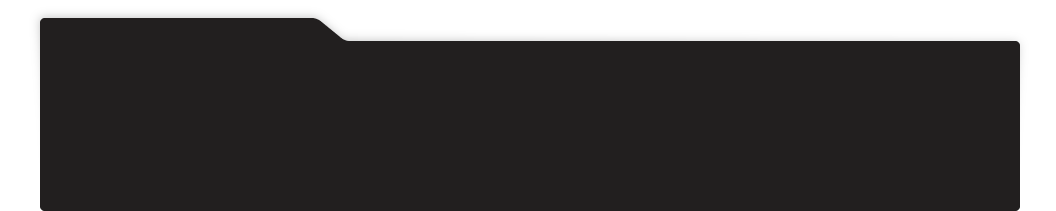
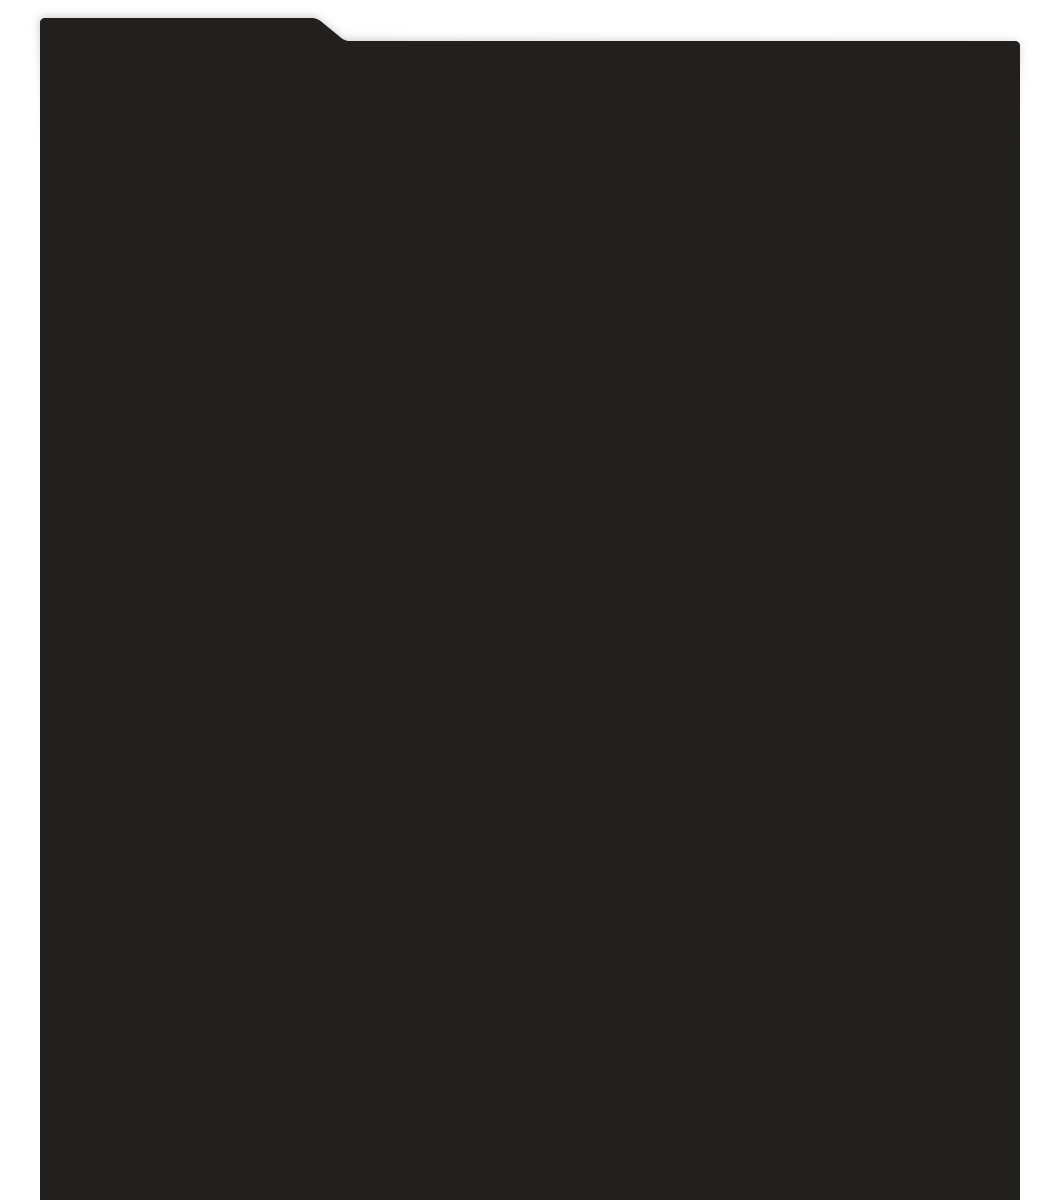
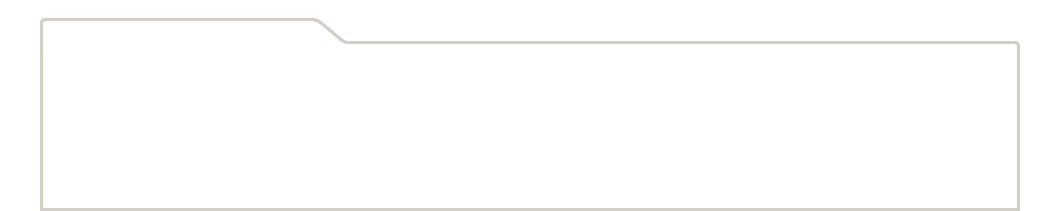
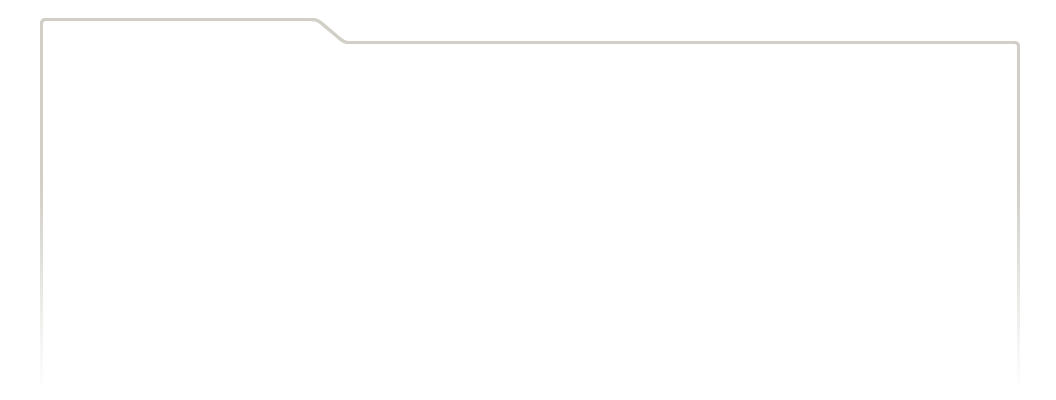
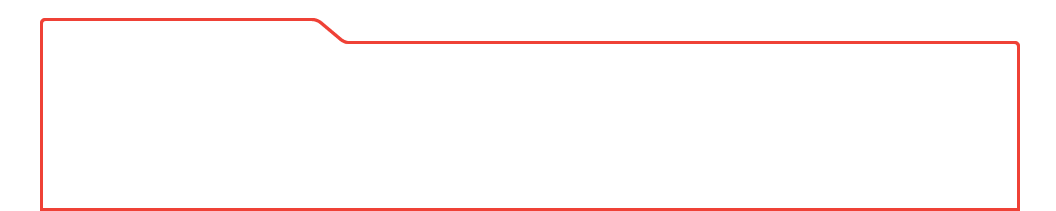
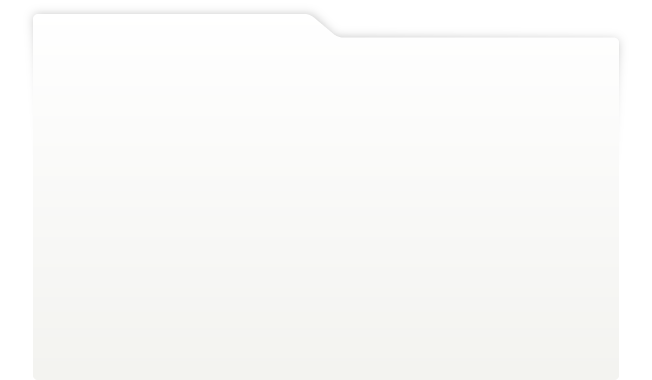
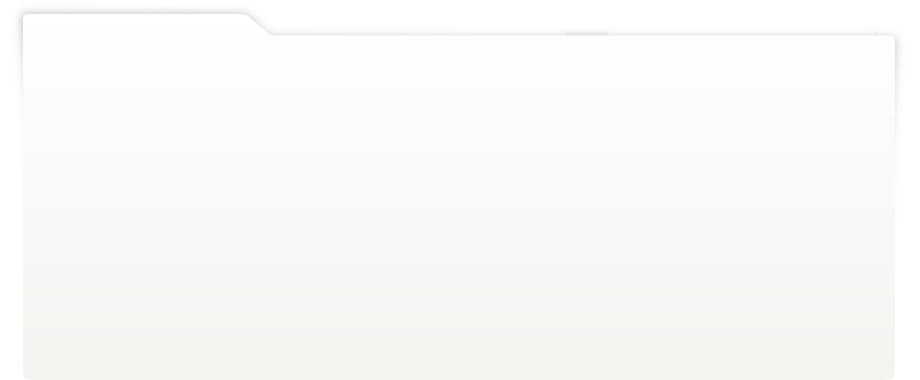
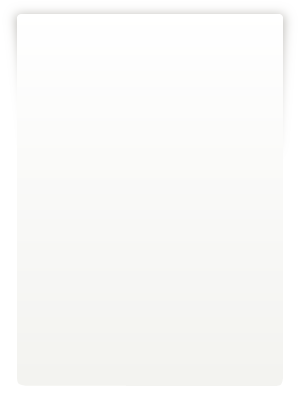
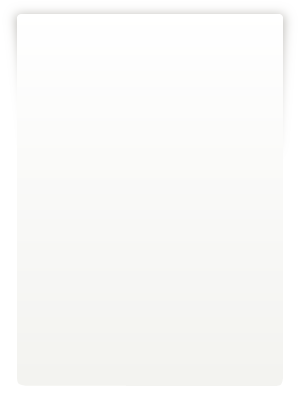
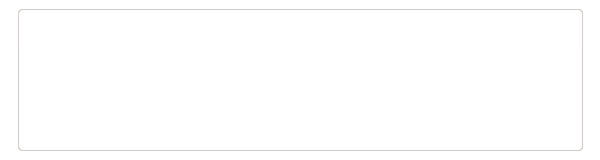
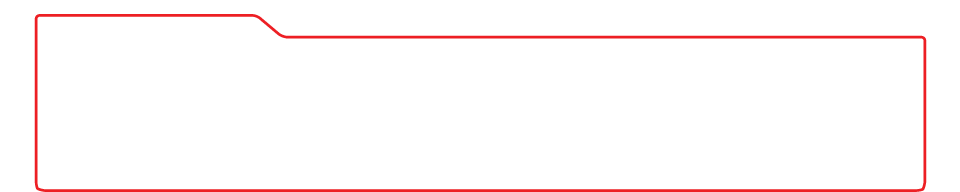
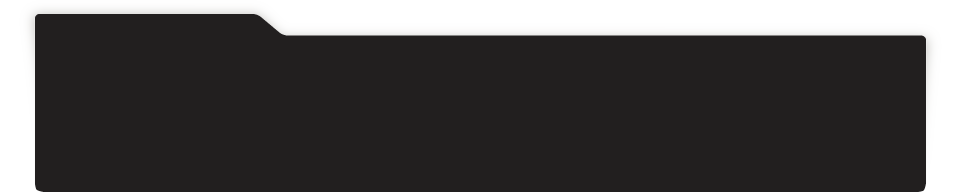
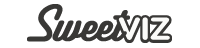
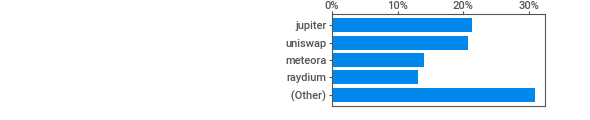
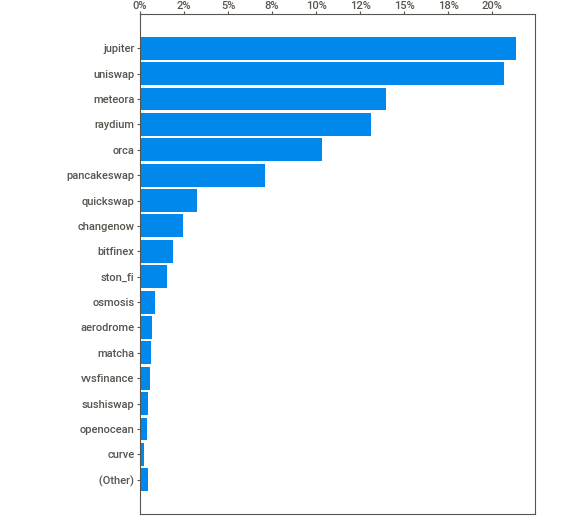
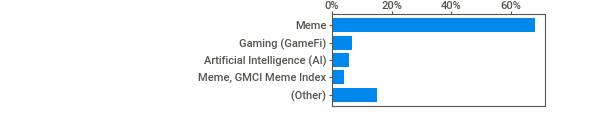
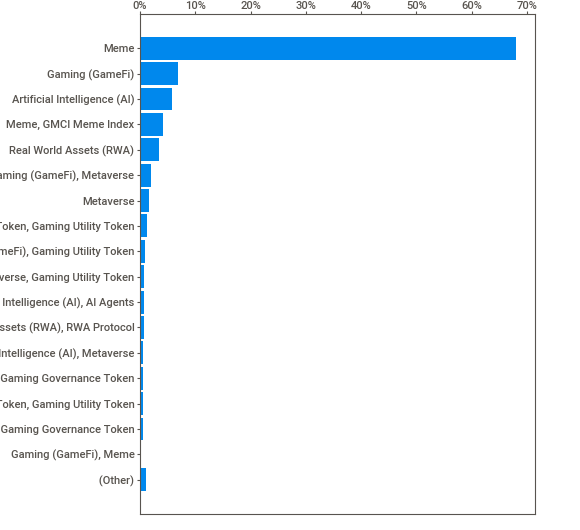
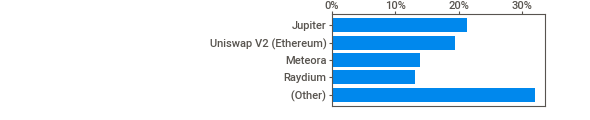
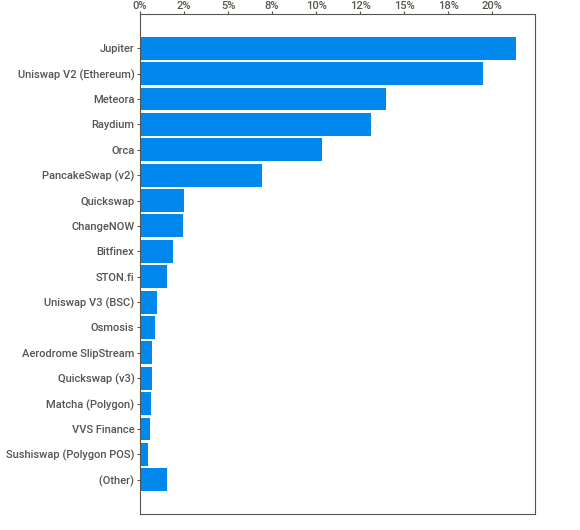
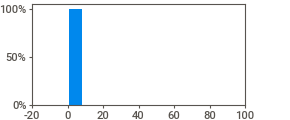
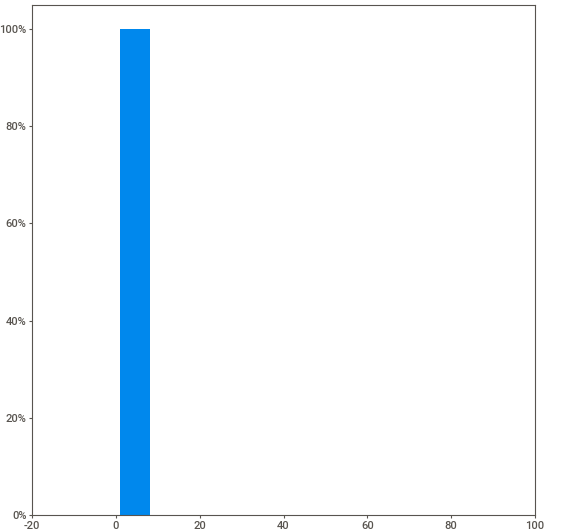
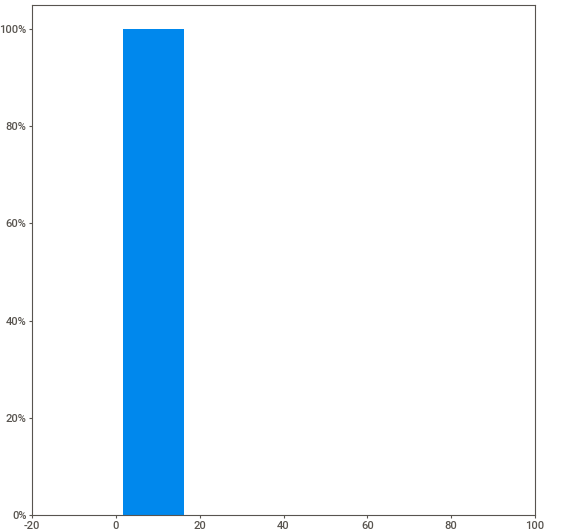
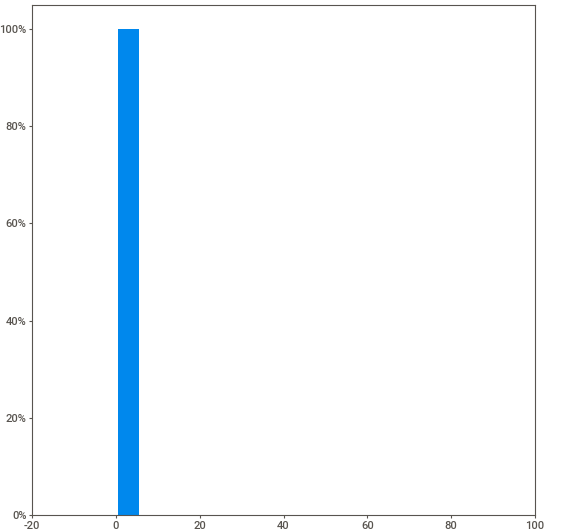
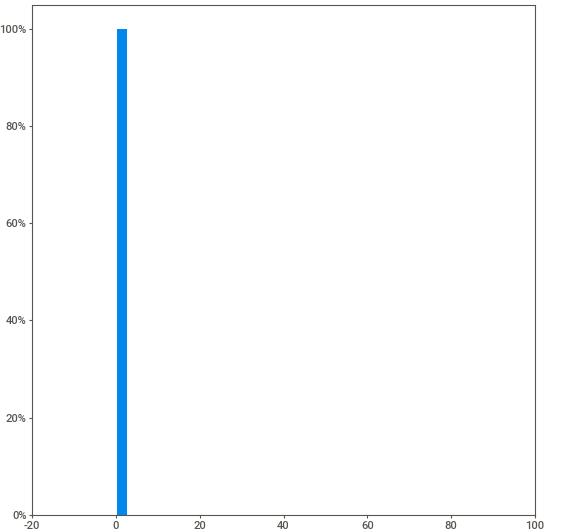
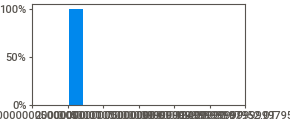
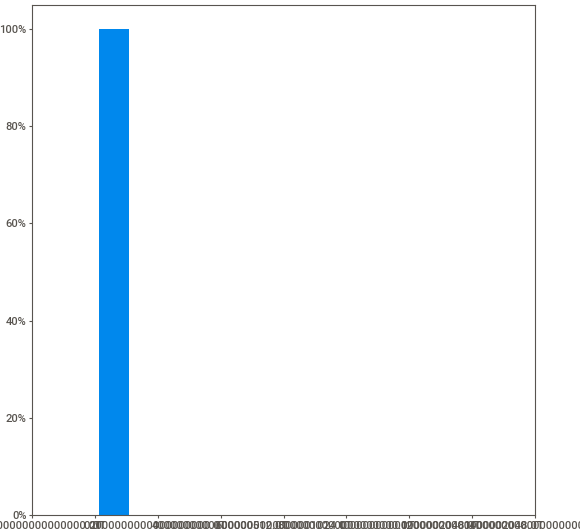
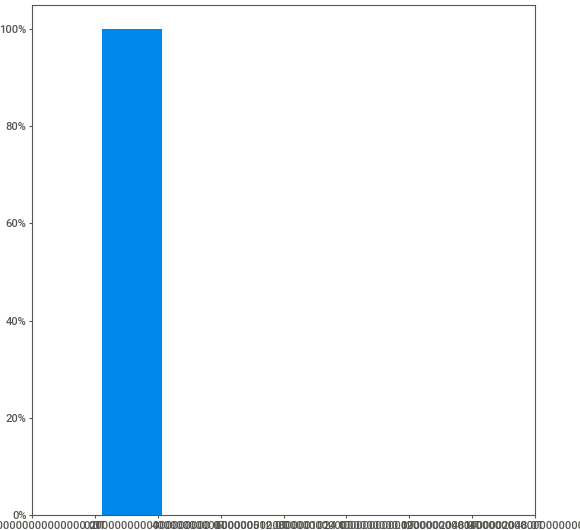
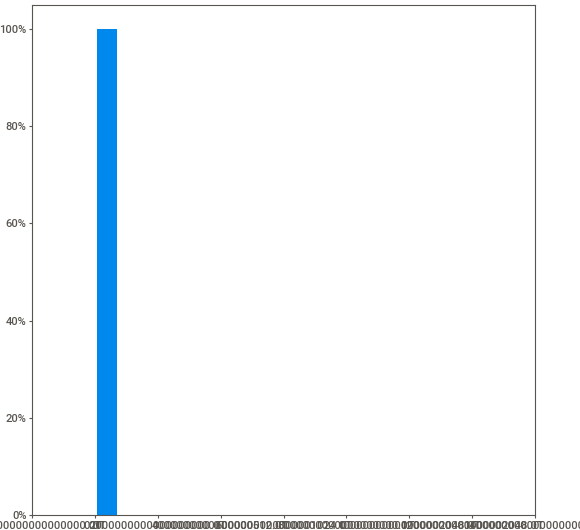
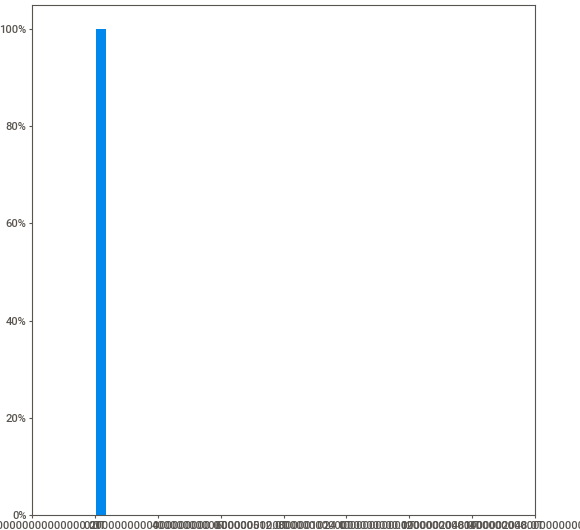
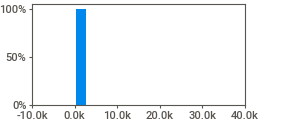
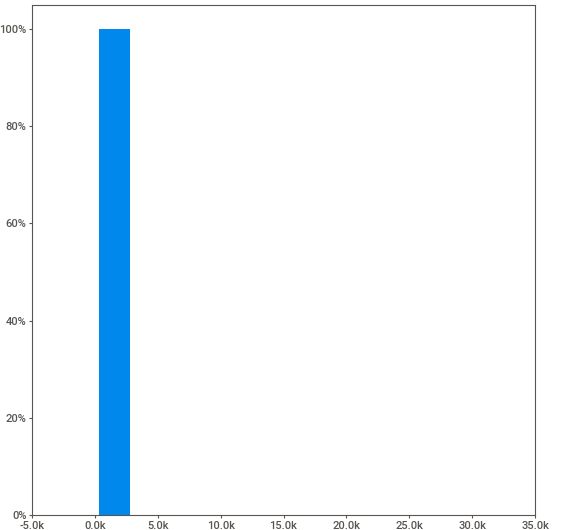
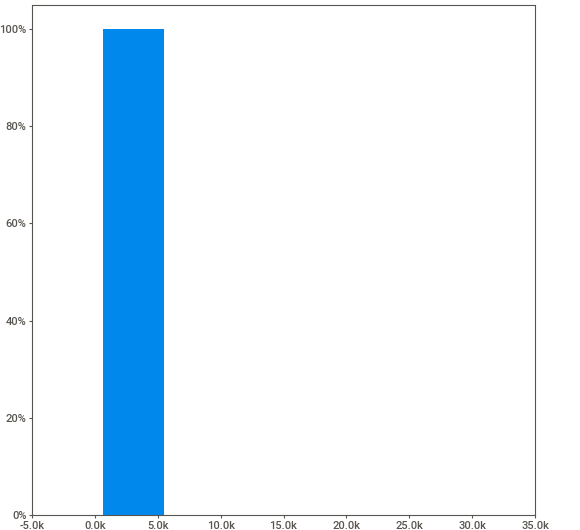
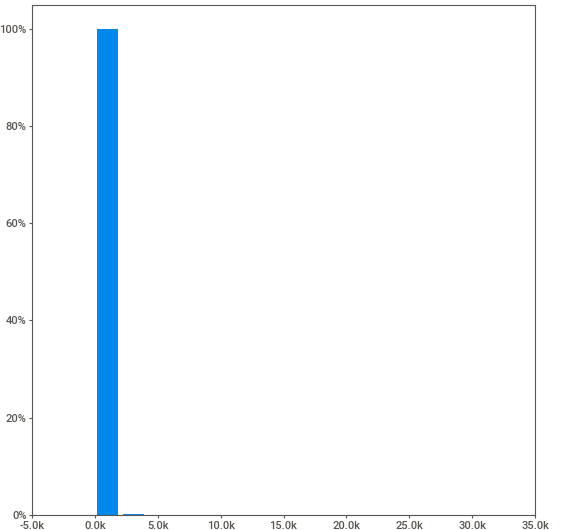
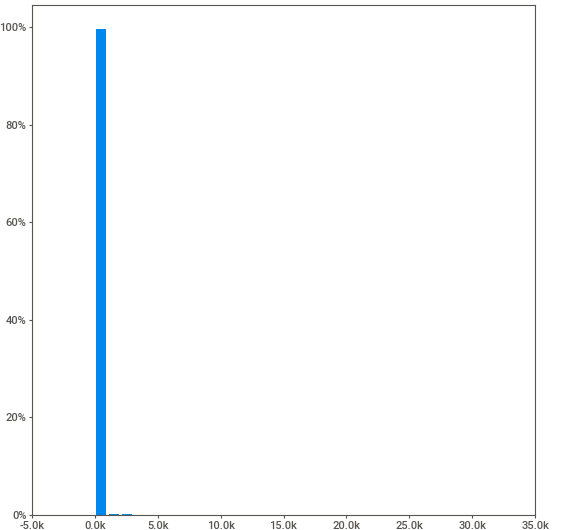
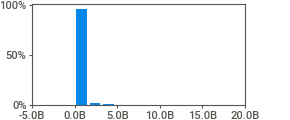
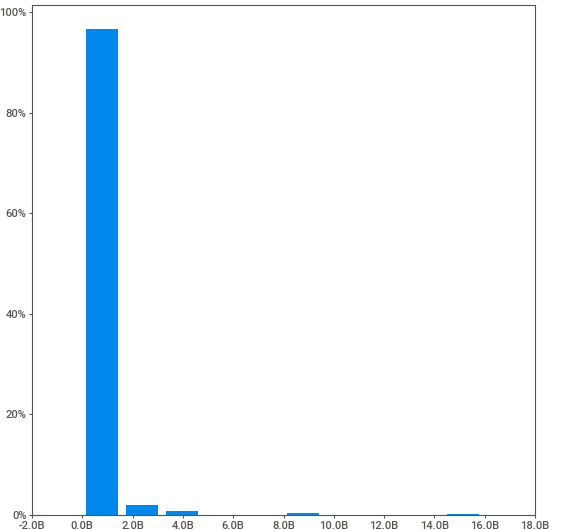
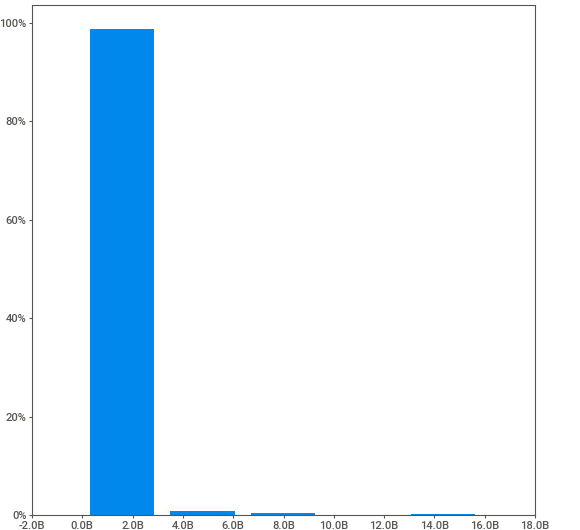
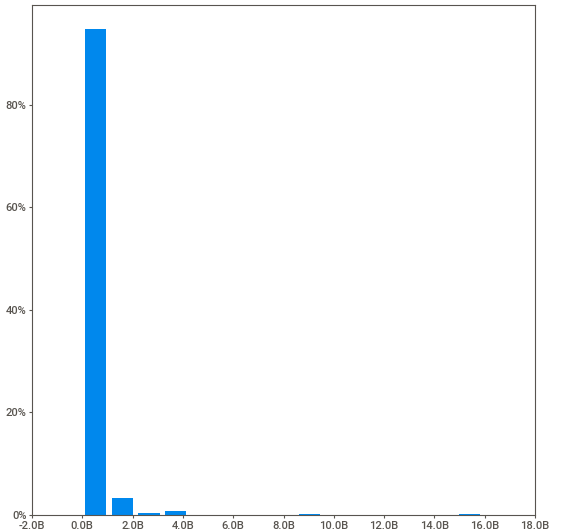
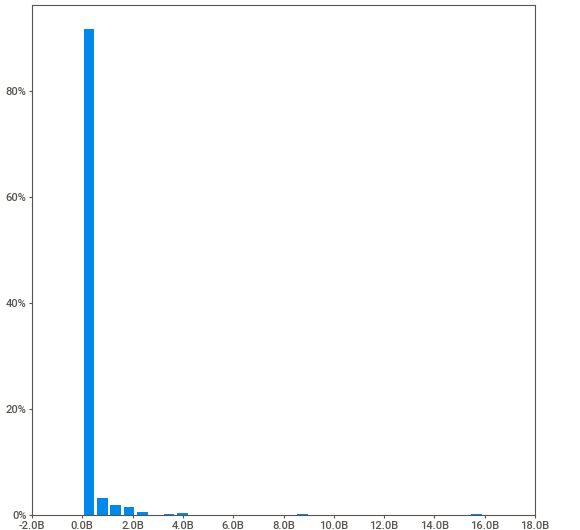
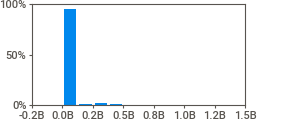
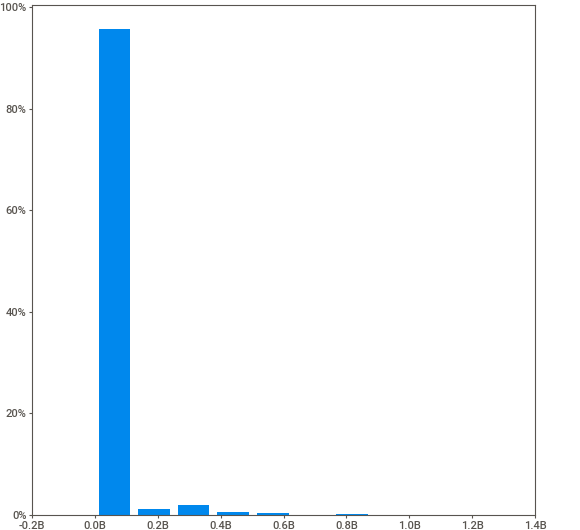
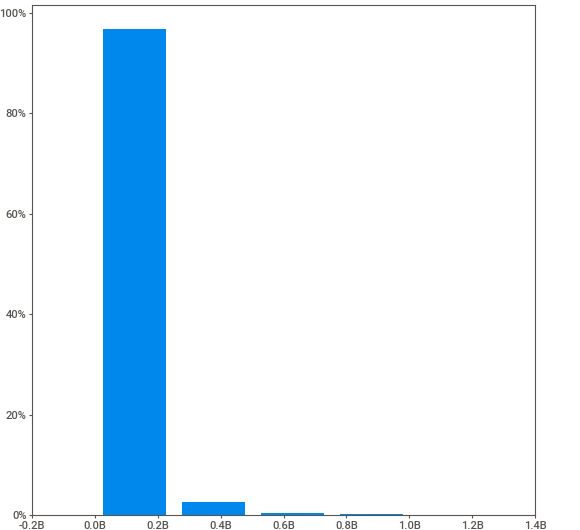
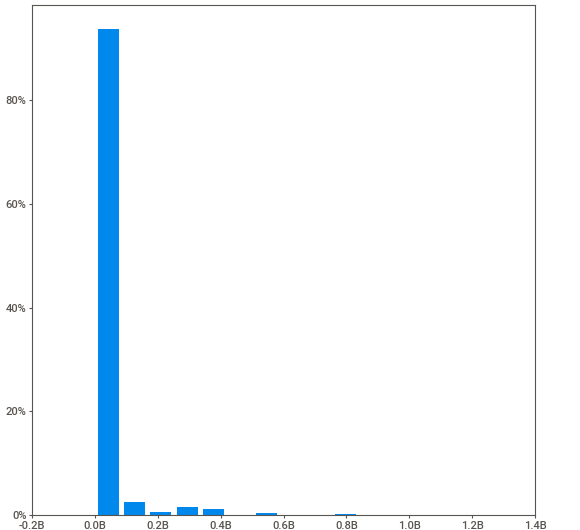
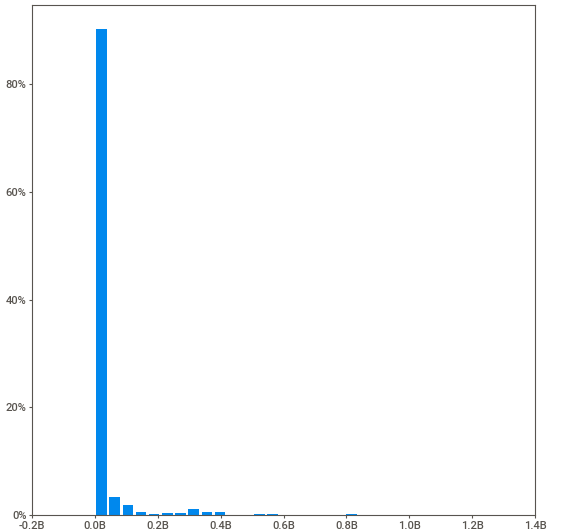
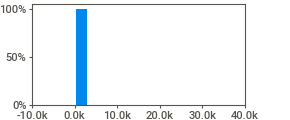
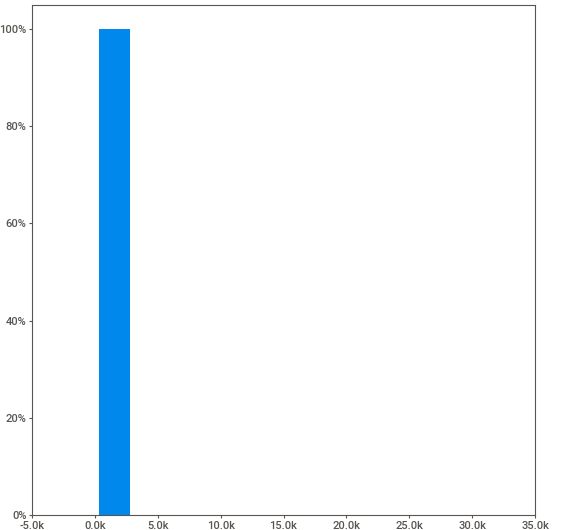
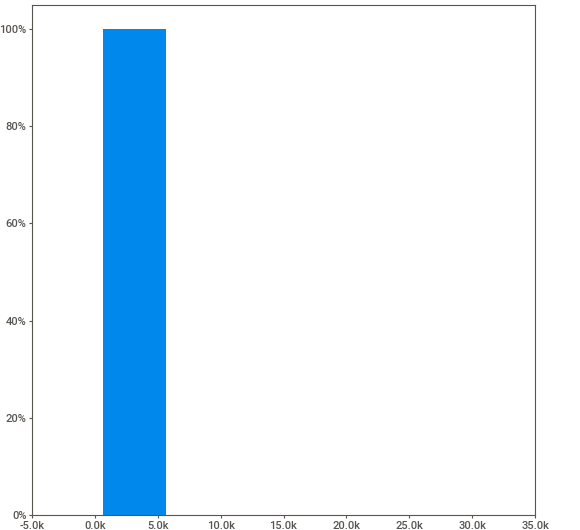
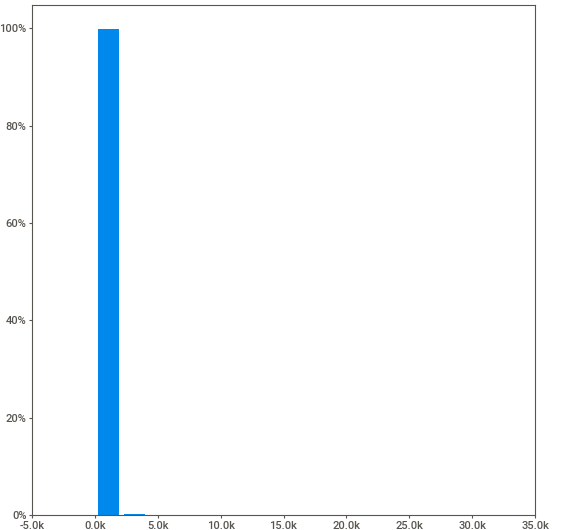
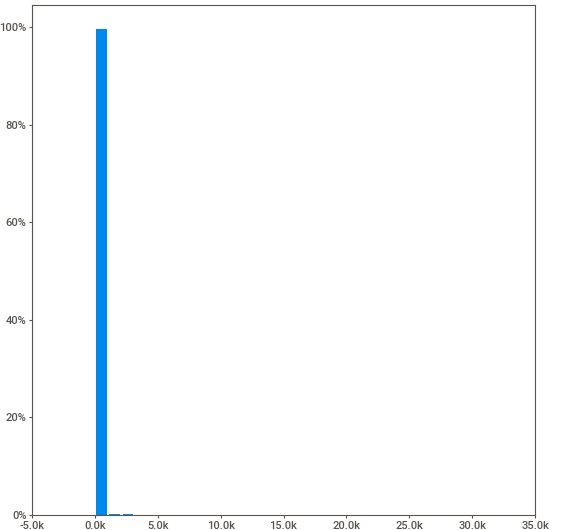
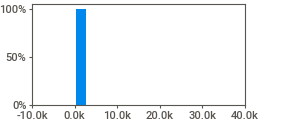
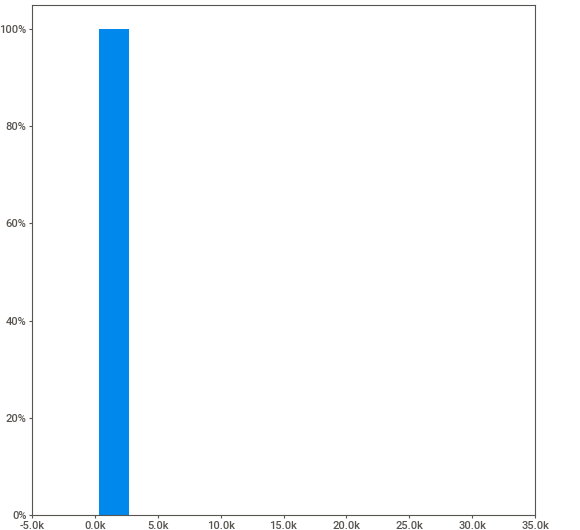
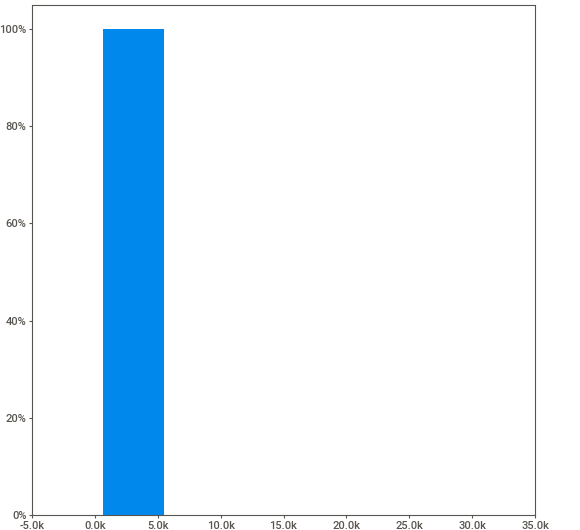
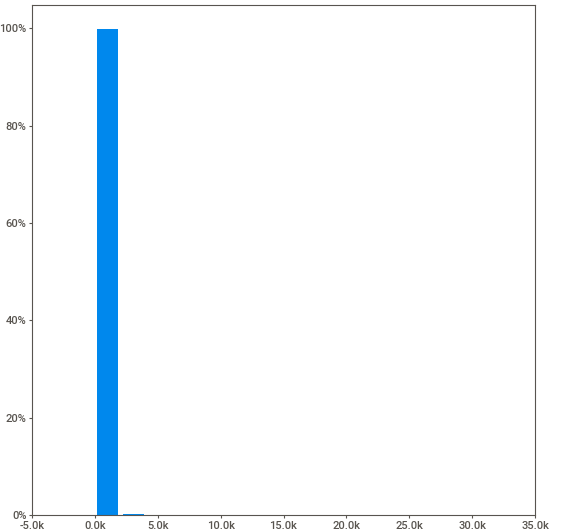
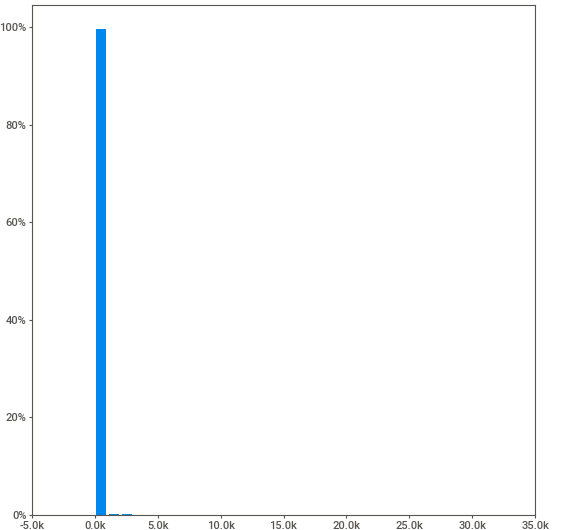
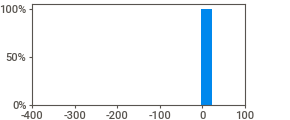
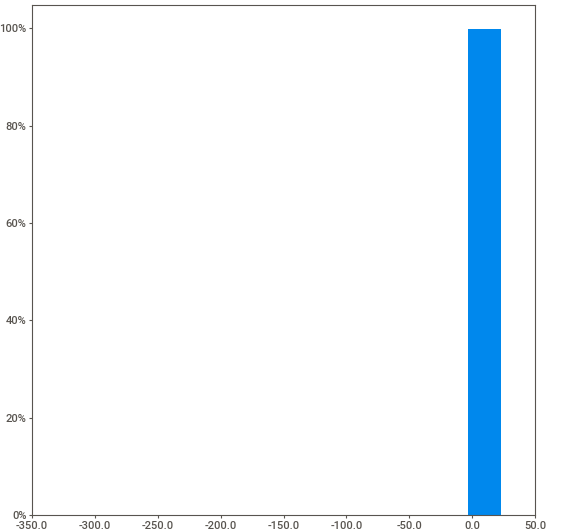
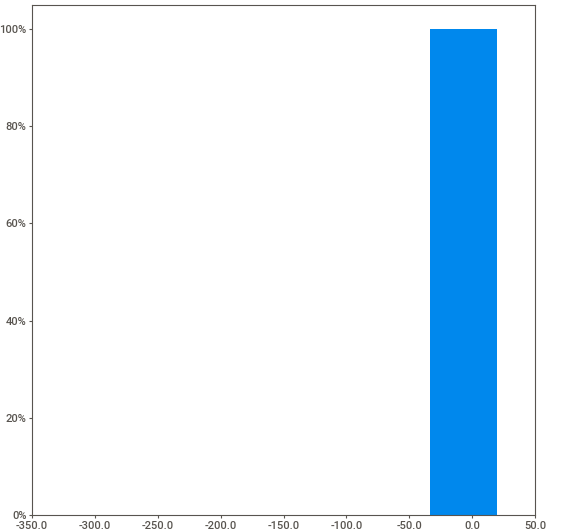
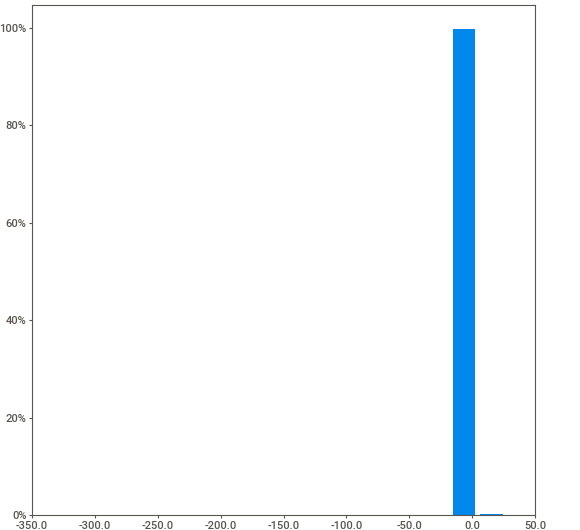
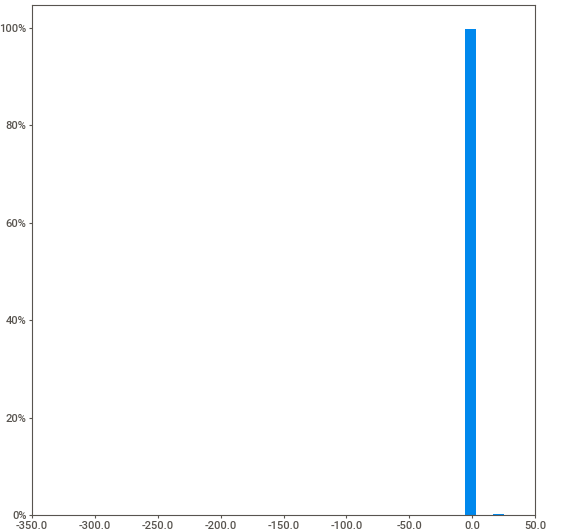
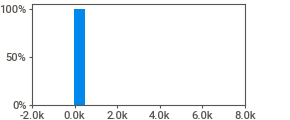
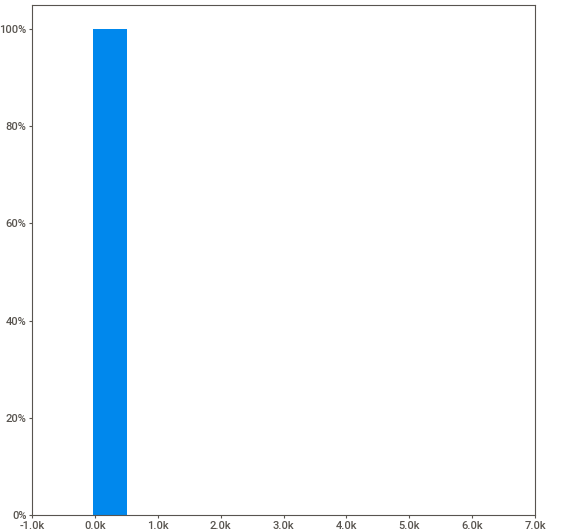
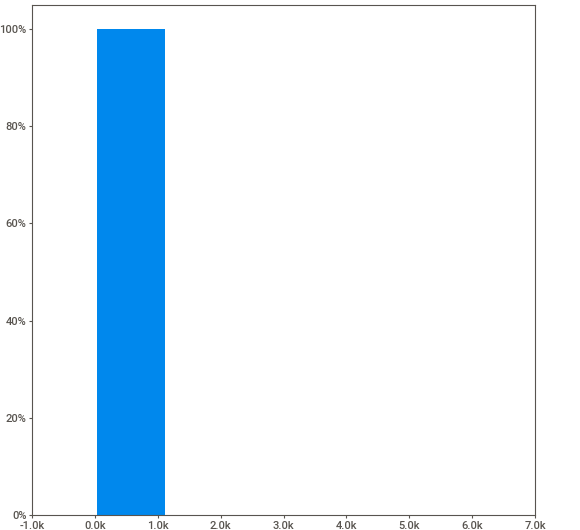
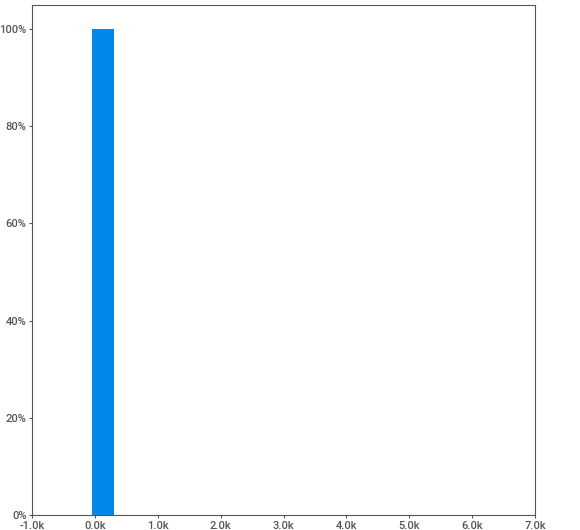
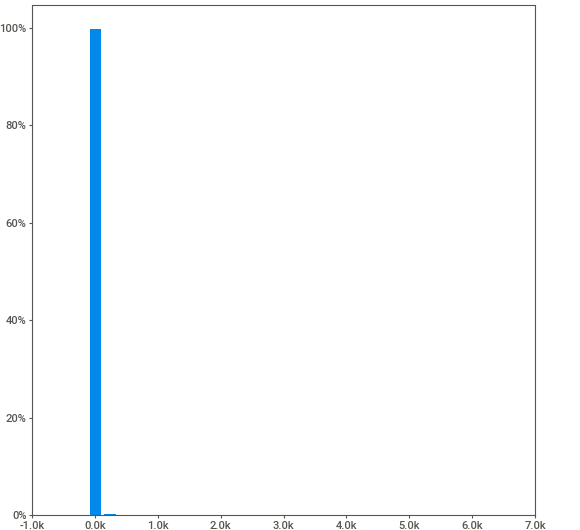
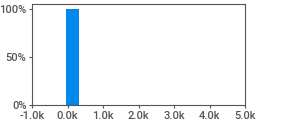
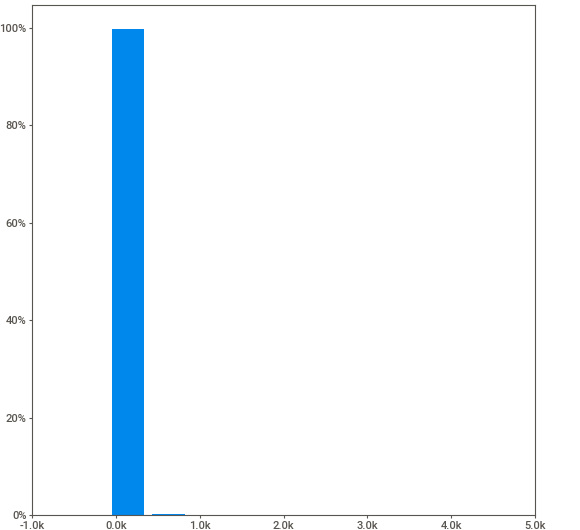
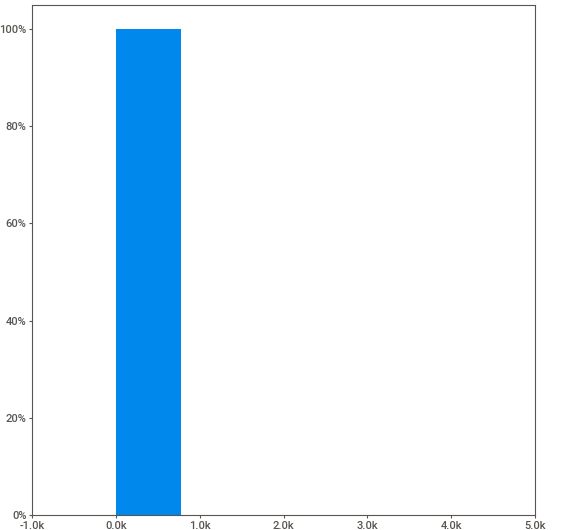
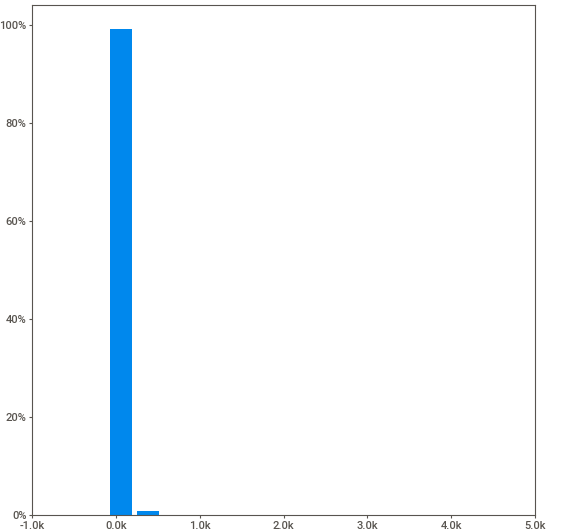
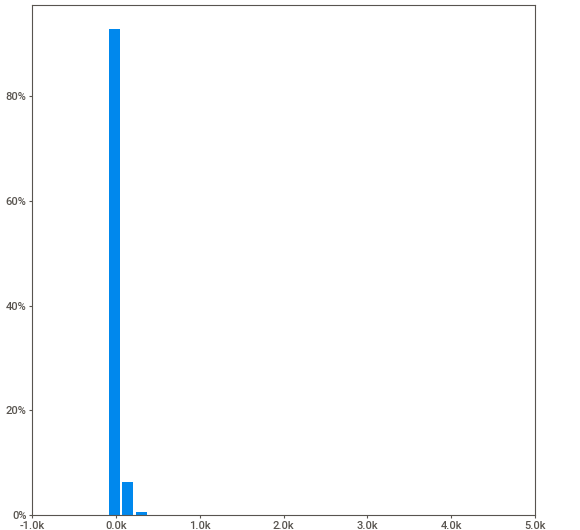
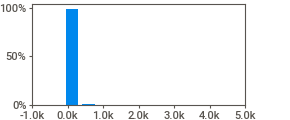
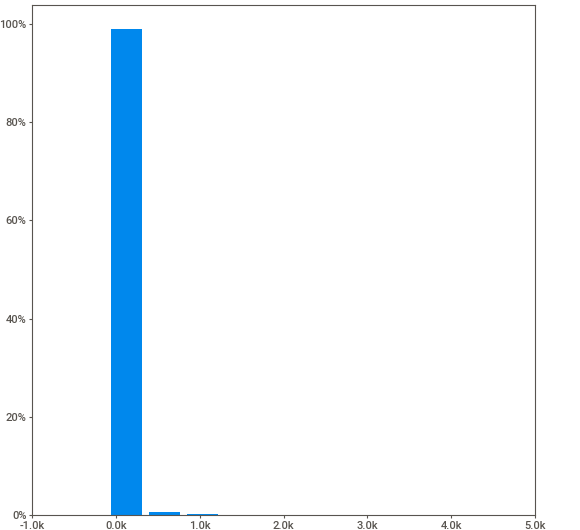
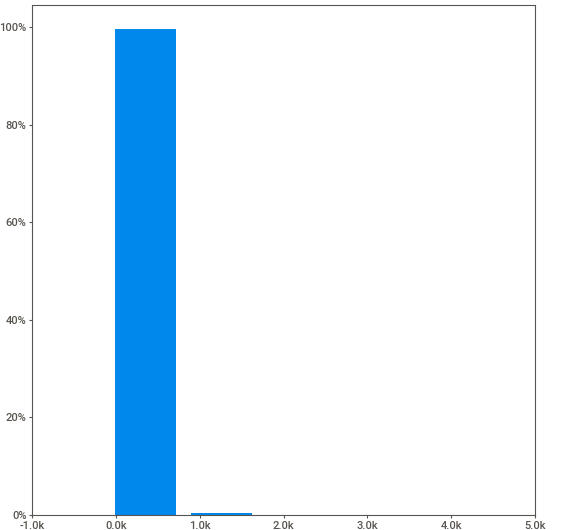
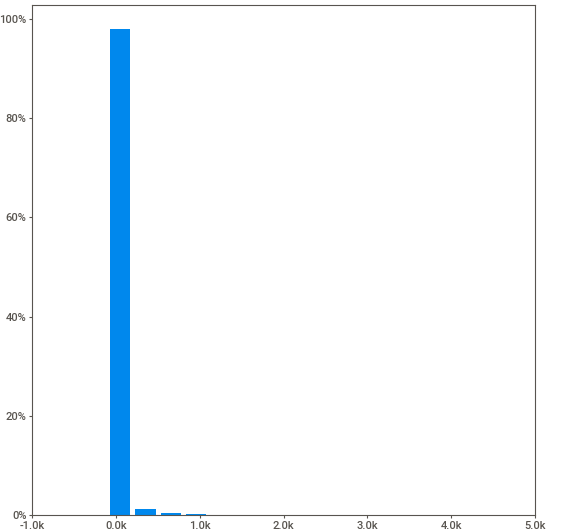
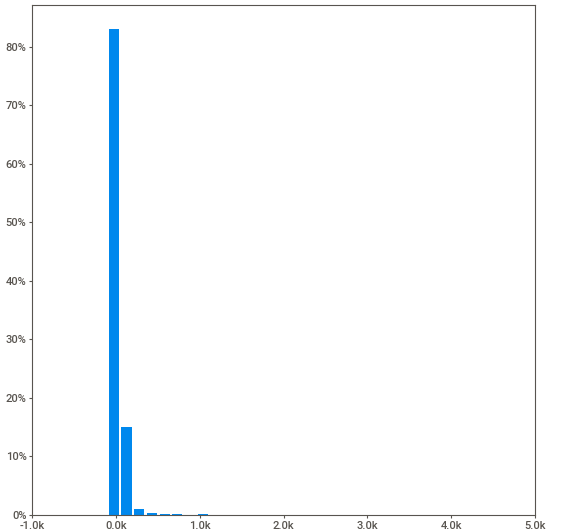
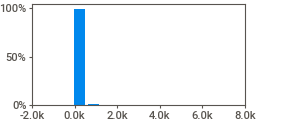
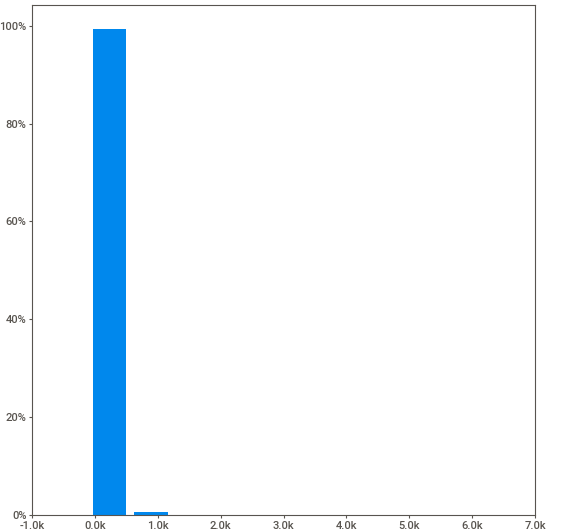
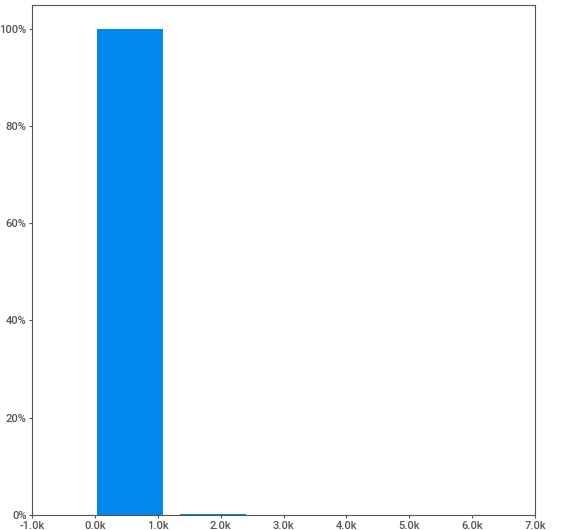
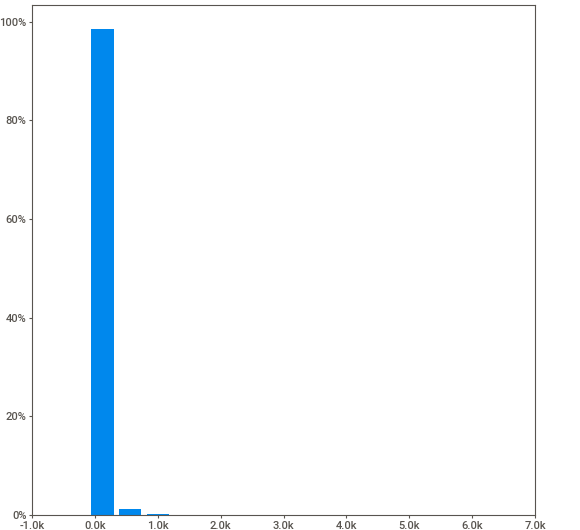
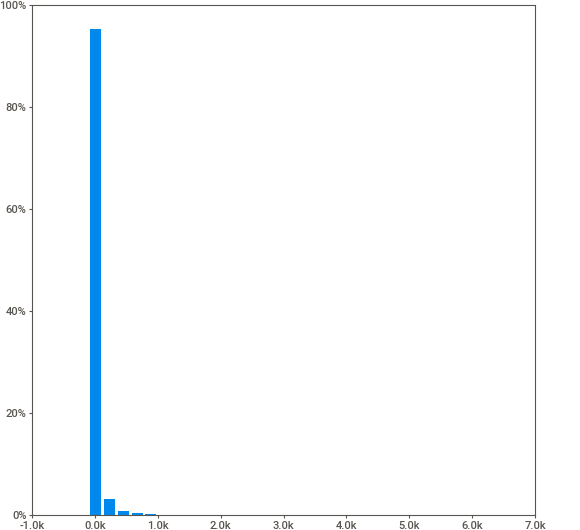
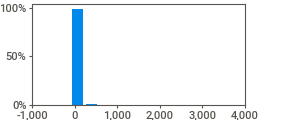
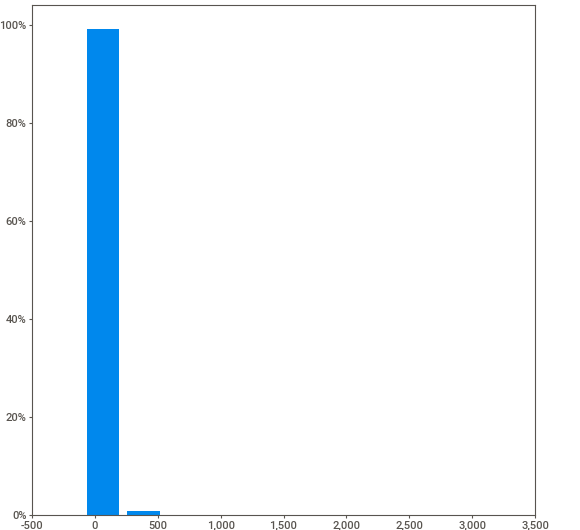
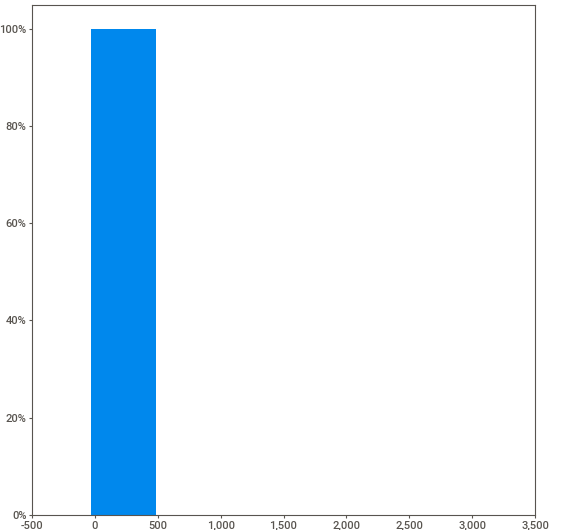
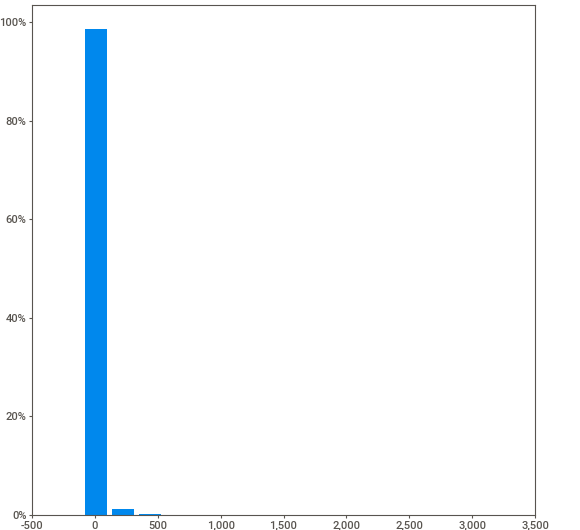
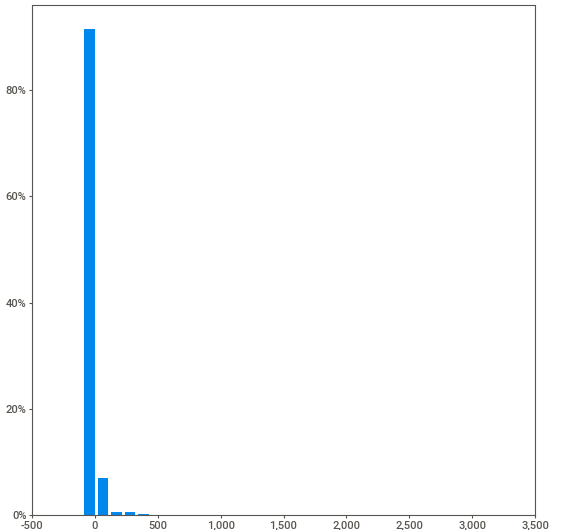
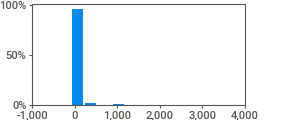
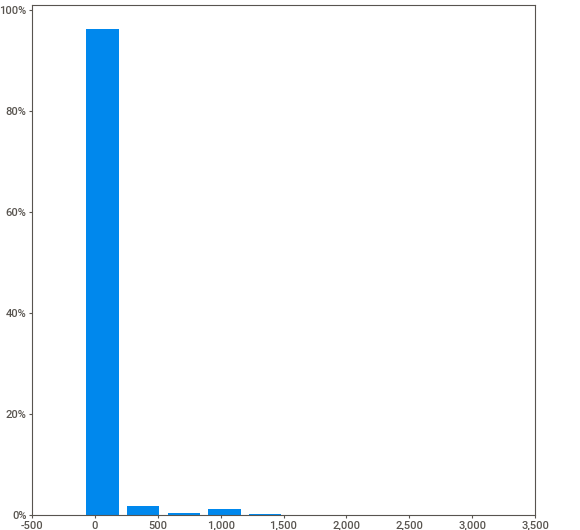
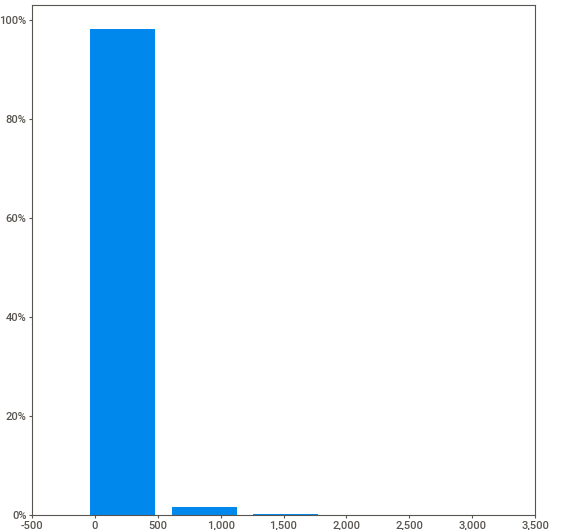
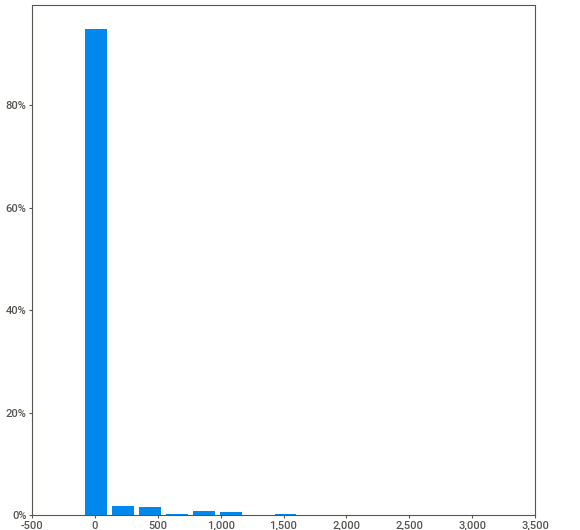
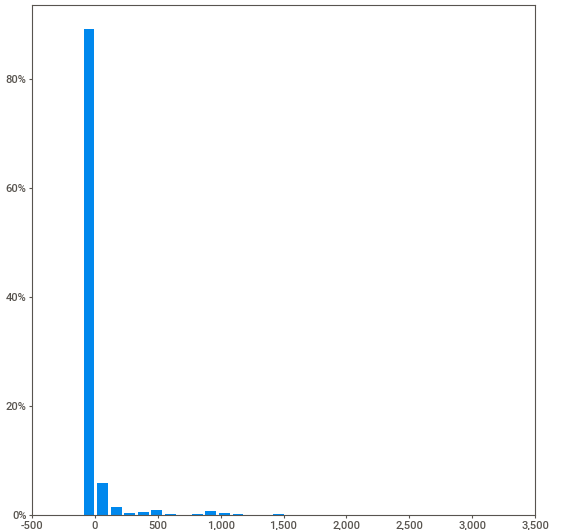
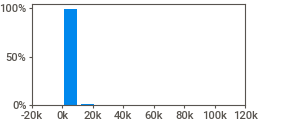
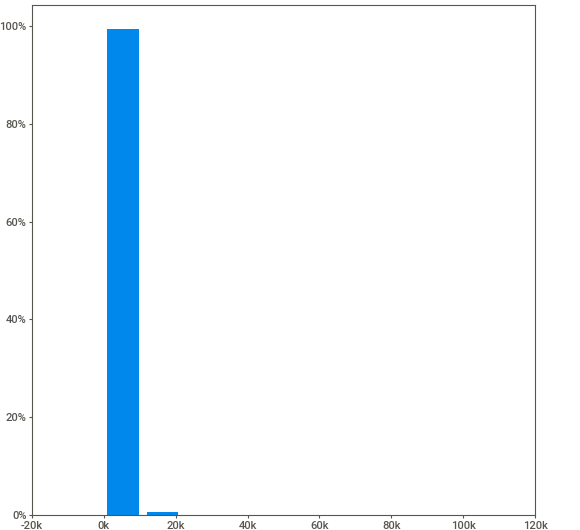
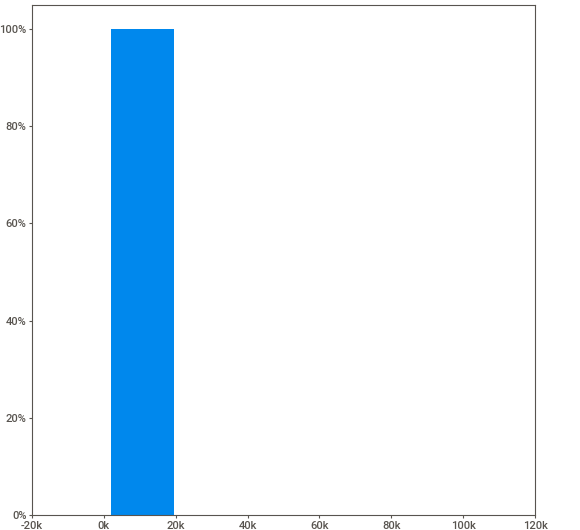
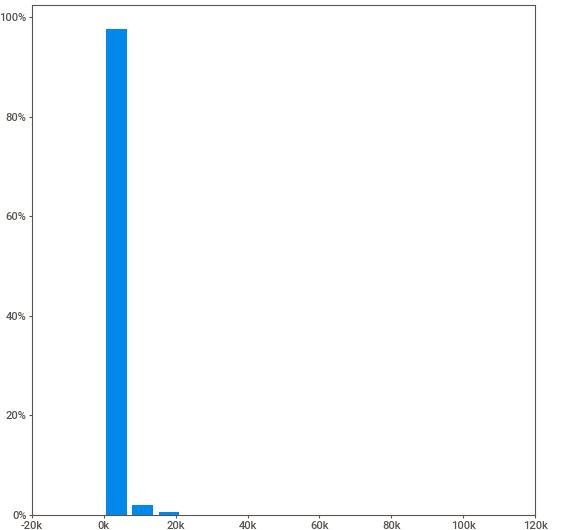
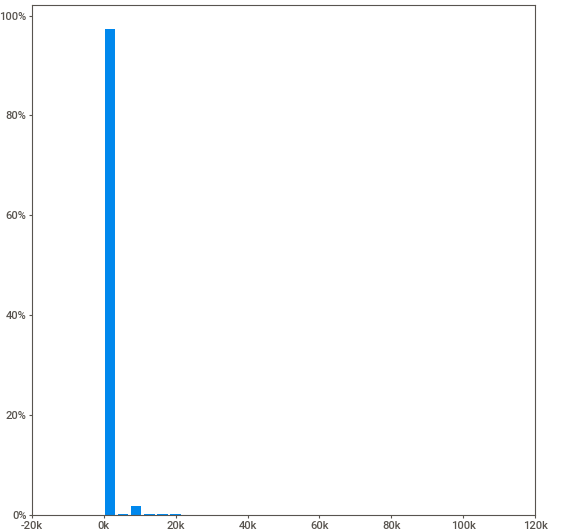
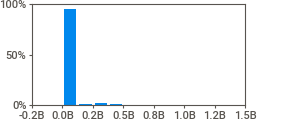
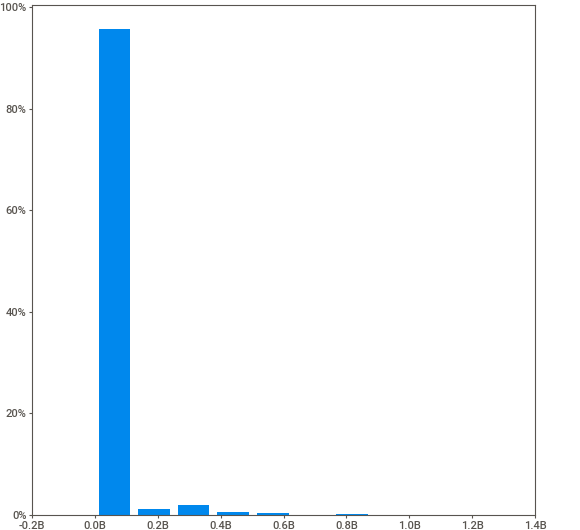
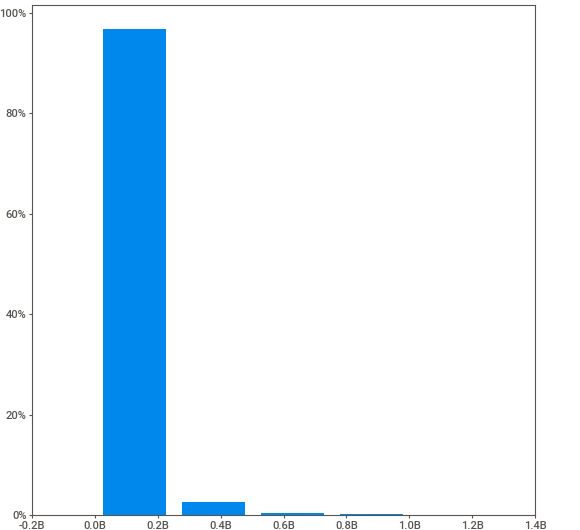
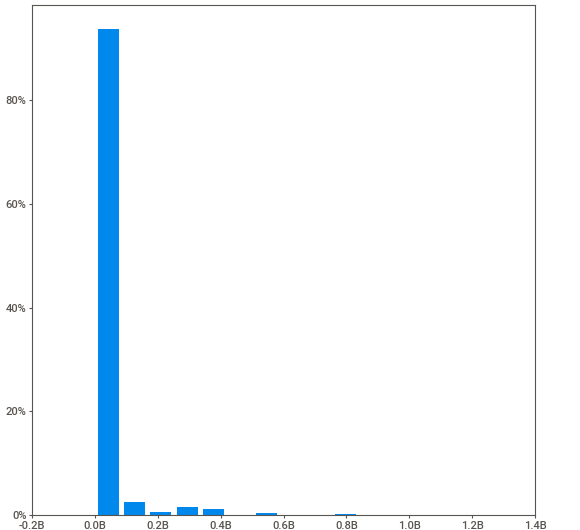
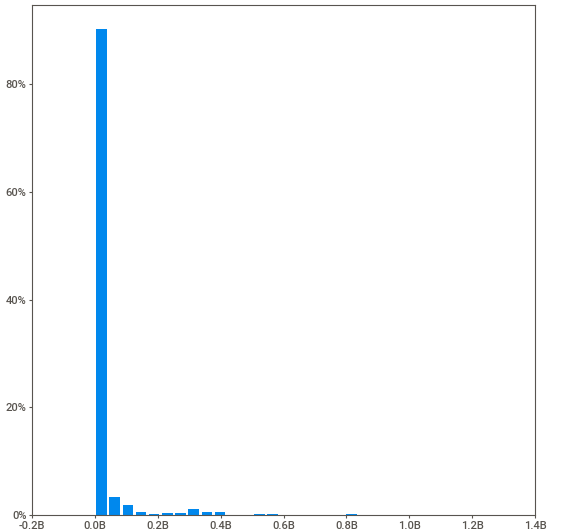
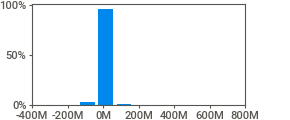
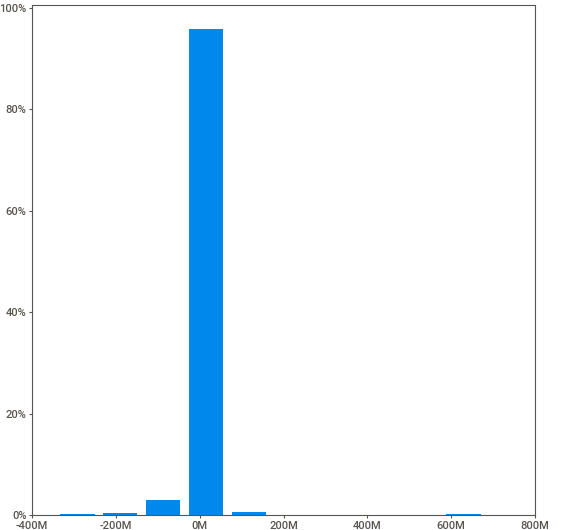
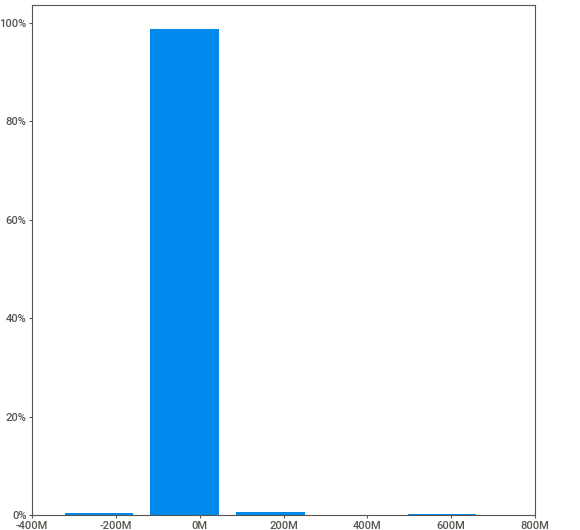
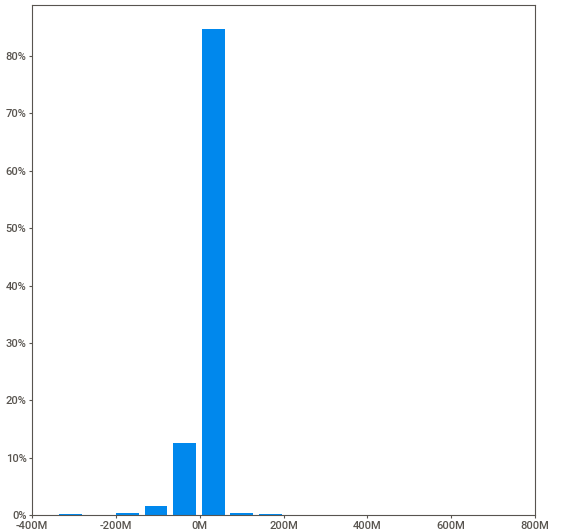
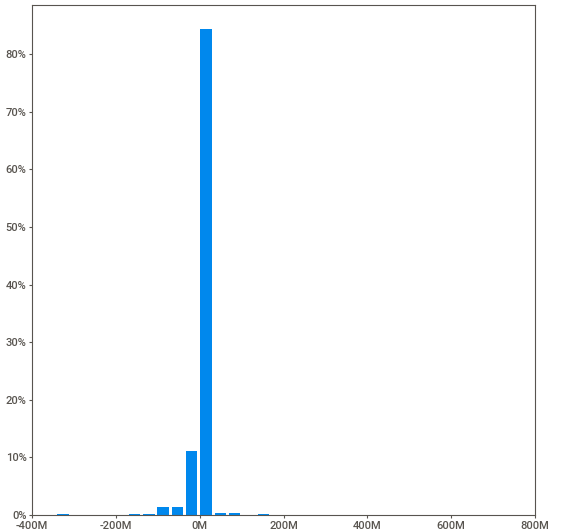
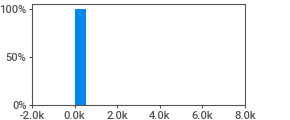
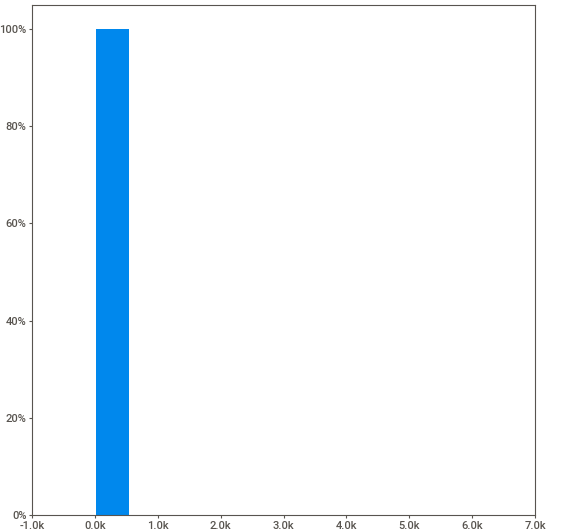
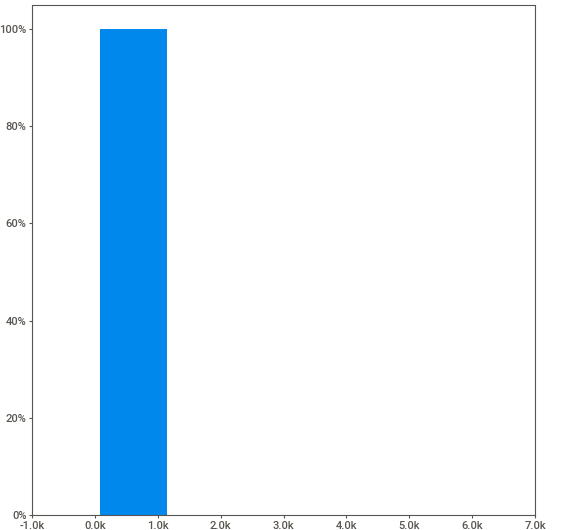
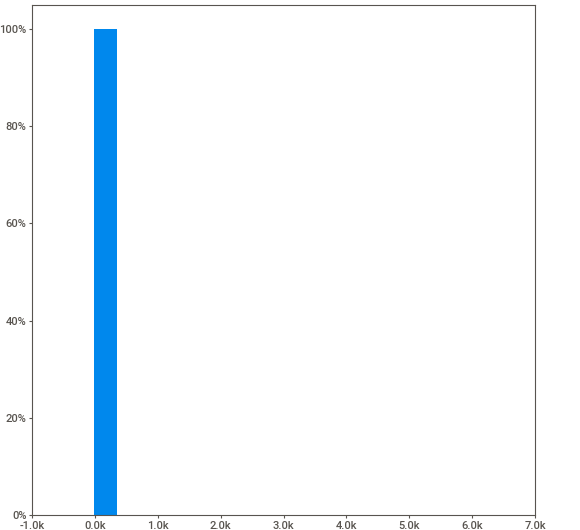
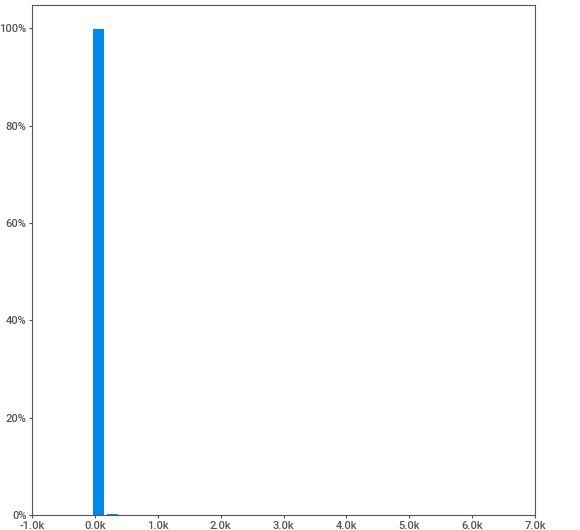
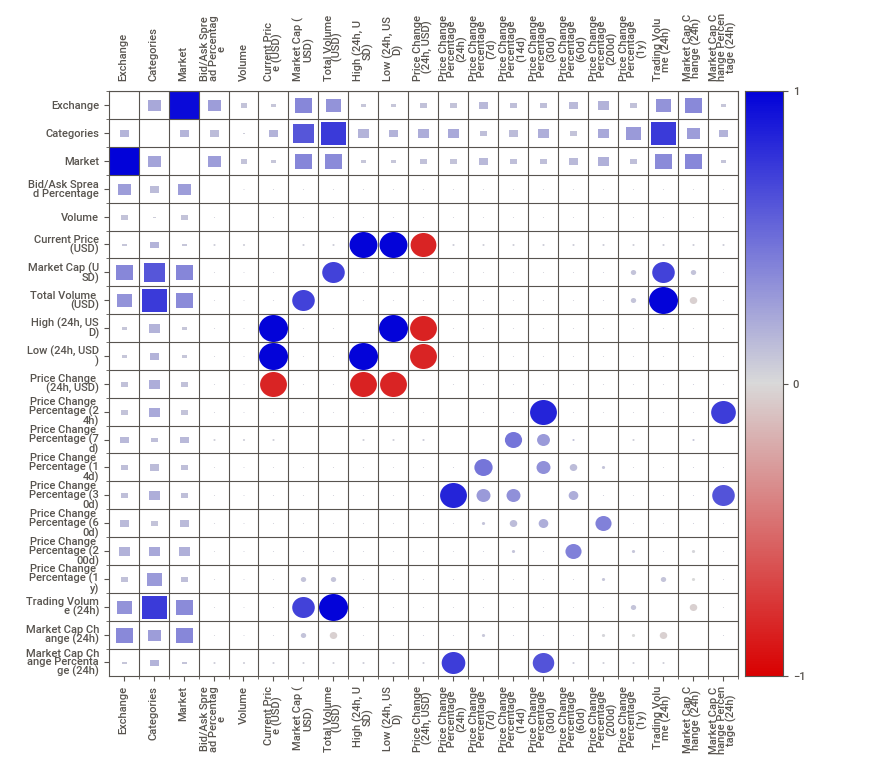
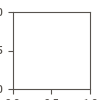

In [ ]:
report = sv.analyze(data)
report.show_notebook()

Identificamos los top 10 tokens por su market cap.

In [ ]:
promedio_marketcap = data.groupby('Token')['Market Cap (USD)'].mean().sort_values(ascending=False)

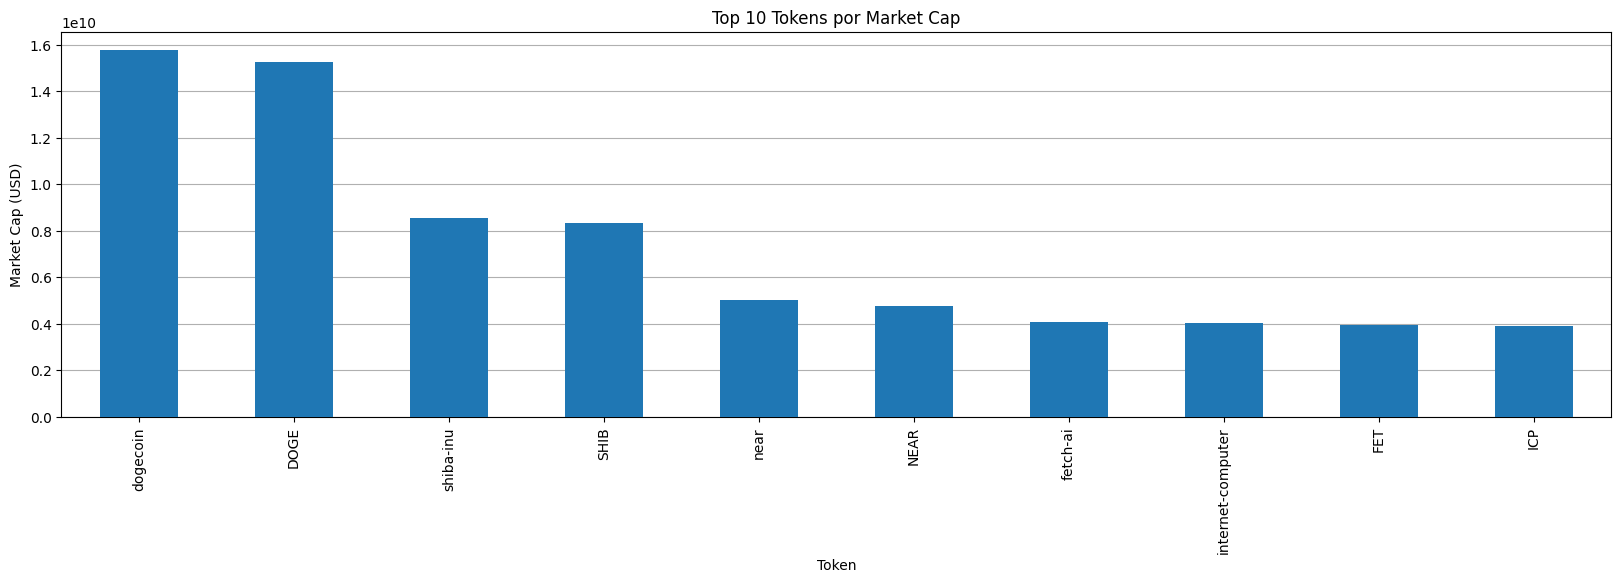

In [ ]:
plt.figure(figsize=(20, 5))
promedio_marketcap[:10].plot(kind='bar',zorder=3)
plt.grid(axis='y',zorder=0)
plt.title('Top 10 Tokens por Market Cap')
plt.xlabel('Token')
plt.ylabel('Market Cap (USD)')
plt.show()

Aqui podemos observar que los top 10 tokens de los intercambios descentralizados, basados en el promedio de su Market Cap son Dogecoin, Doge, Shiba-Inu, SHIB, near, NEAR, fetch-ai, internet-computer, FET e ICP. Cabe resaltar que los primeros 3 tokens pertenecen a la categoria de memes.

#### Identificamos la relacion entre la capitalizacion del mercado y el market cap

In [ ]:
data['Volatilidad']=data[['Price Change Percentage (60d)','Price Change Percentage (30d)','Price Change Percentage (14d)',
                                              'Price Change Percentage (7d)']].std(axis=1)

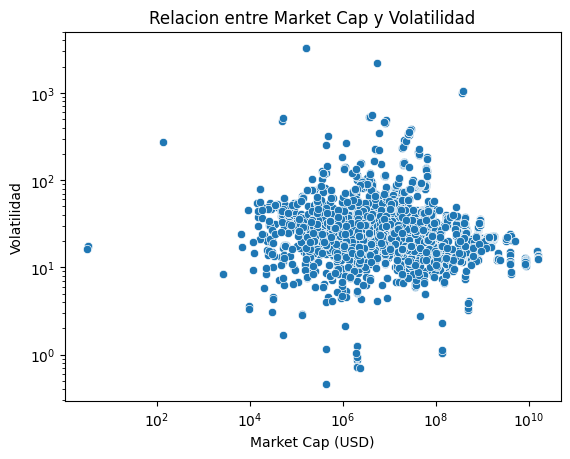

In [ ]:
sns.scatterplot(x='Market Cap (USD)', y='Volatilidad', data=data)
plt.title('Relacion entre Market Cap y Volatilidad')
plt.xscale('log')
plt.yscale('log')

In [ ]:
top10_volMC= data[(data['Market Cap (USD)'] < 10000000) & (data['Volatilidad']> data['Volatilidad'].quantile(0.75))]
top10_volMC[['Token','Market Cap (USD)', 'Volatilidad']].head(5)

,Token,Market Cap (USD),Volatilidad
87,scorum,202545.0,37.939918
88,scorum,202545.0,37.939918
130,shiba-predator,4571038.0,44.432086
201,tron-bull-coin,6749160.0,154.590756
224,keyboard-cat-base,9976682.0,44.406470


En el siguiente grafico podemos observar que los tokens con mayor volatibilidad no son los que tienen el mayor valor de capitalizacion del mercado. Al poder visualizar las monedas con mayor volatilidad y poca capitalizacion de mercado tiene mayor posibilidad de subir rapidamente su precio. En este caso serian los token de scorum y shiba-predator.

#### Identificamos la relacion entre volumen y precio de los intercambios

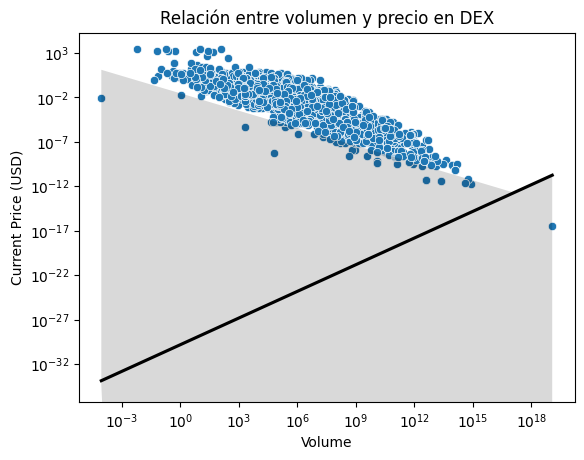

In [ ]:
sns.scatterplot(x='Volume', y='Current Price (USD)', data=data)
sns.regplot(x='Volume', y='Current Price (USD)', scatter=False, color='black', data=data)
plt.title('Relación entre volumen y precio en DEX')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
exchanges = data['Exchange'].unique()

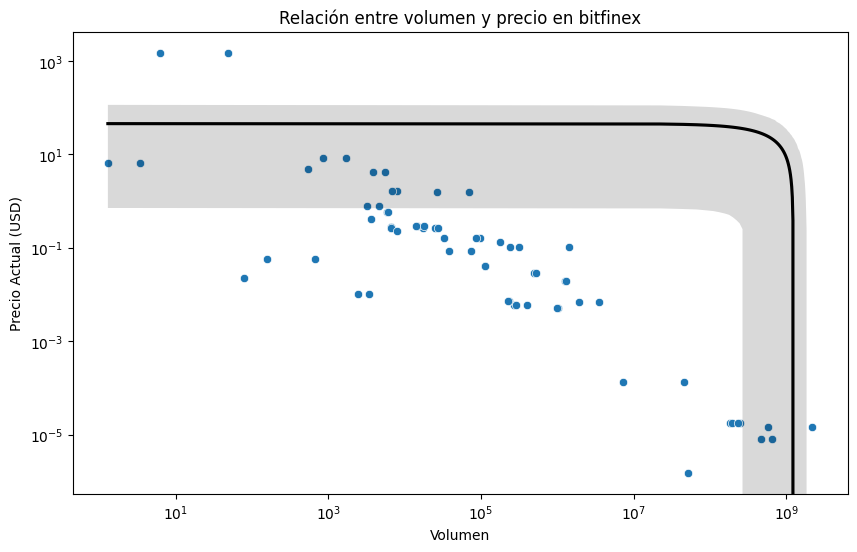

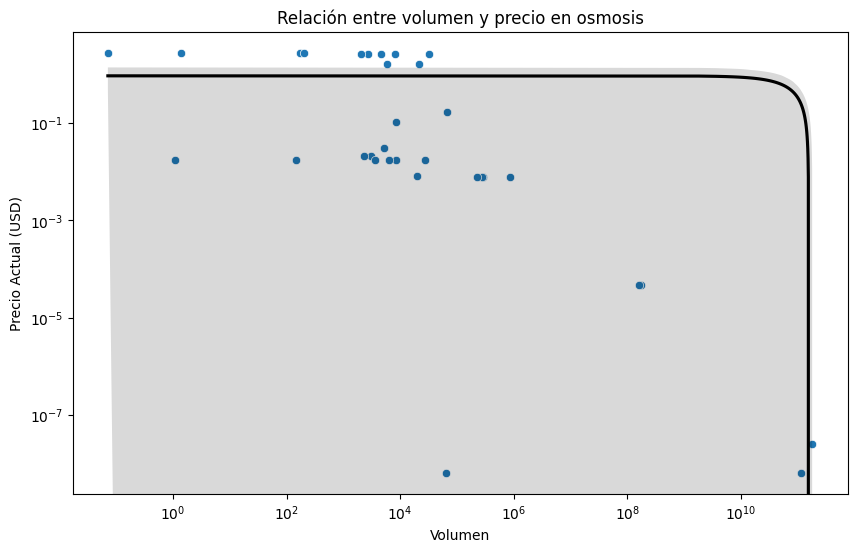

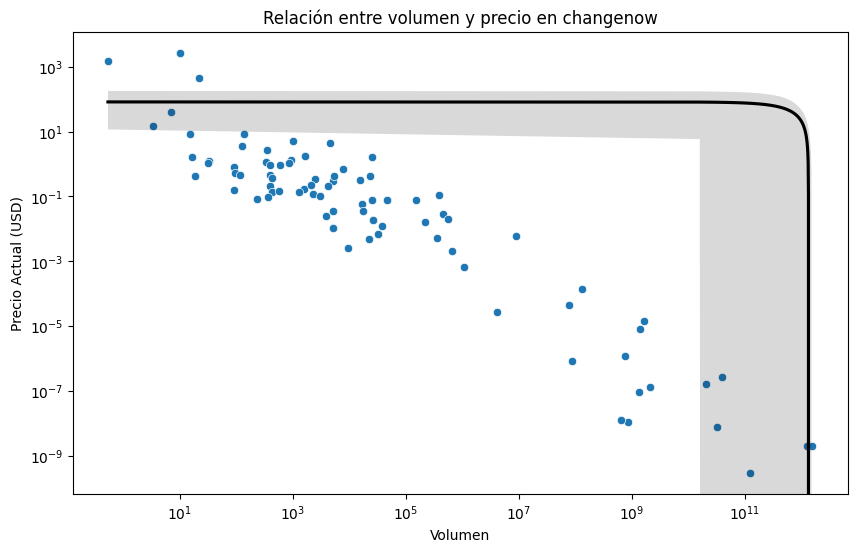

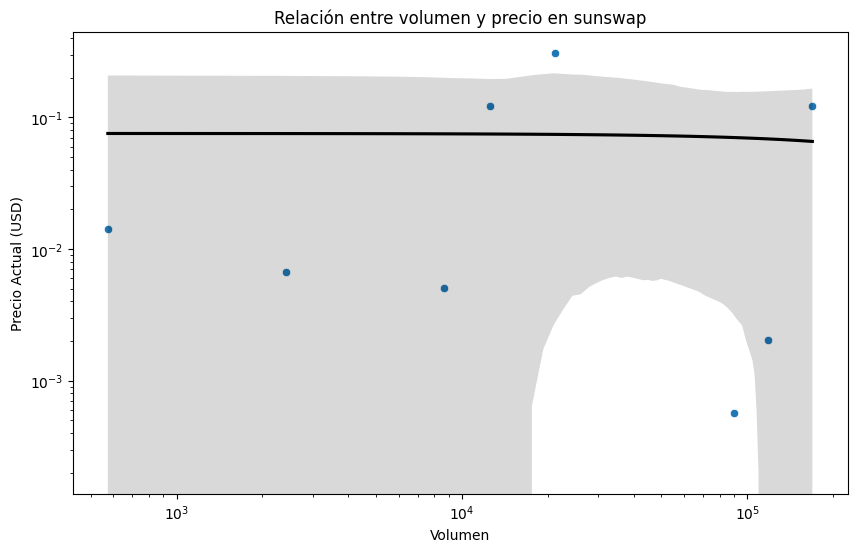

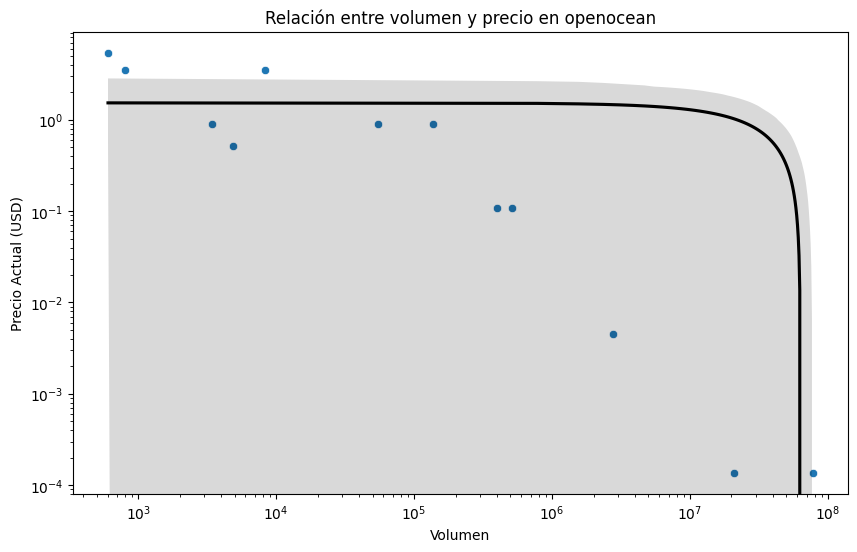

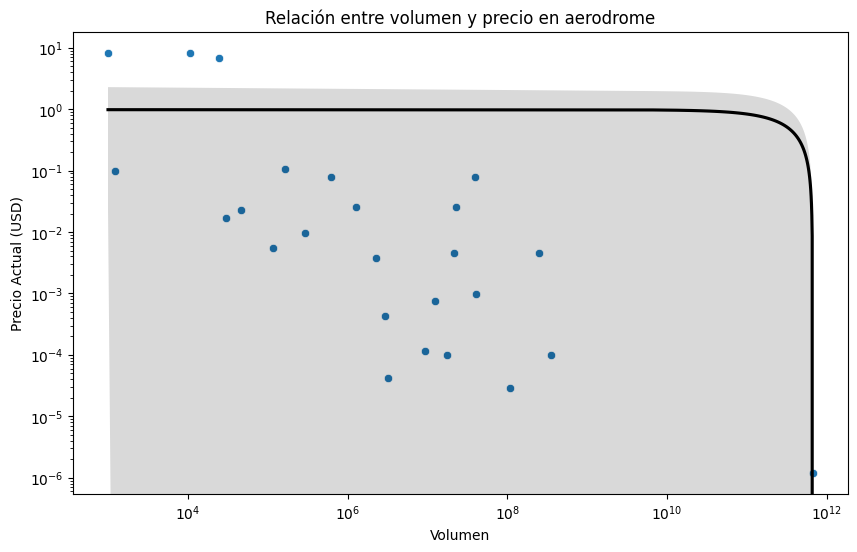

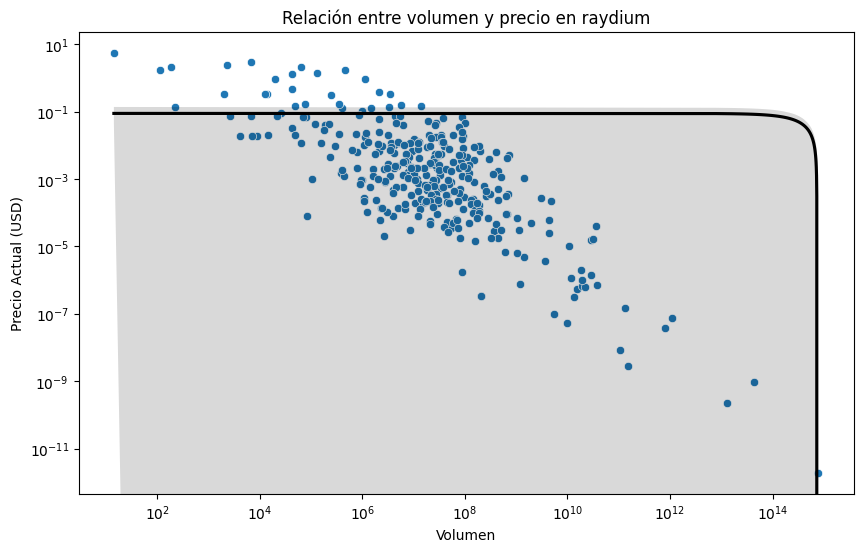

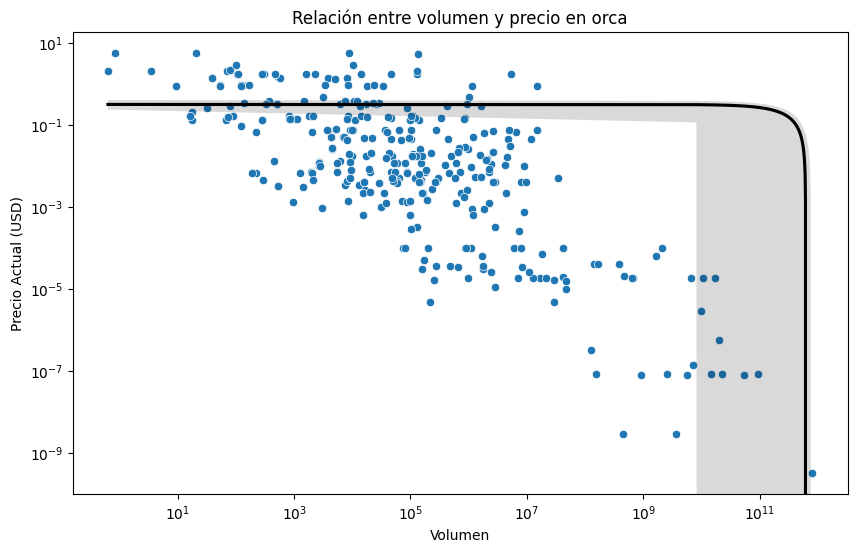

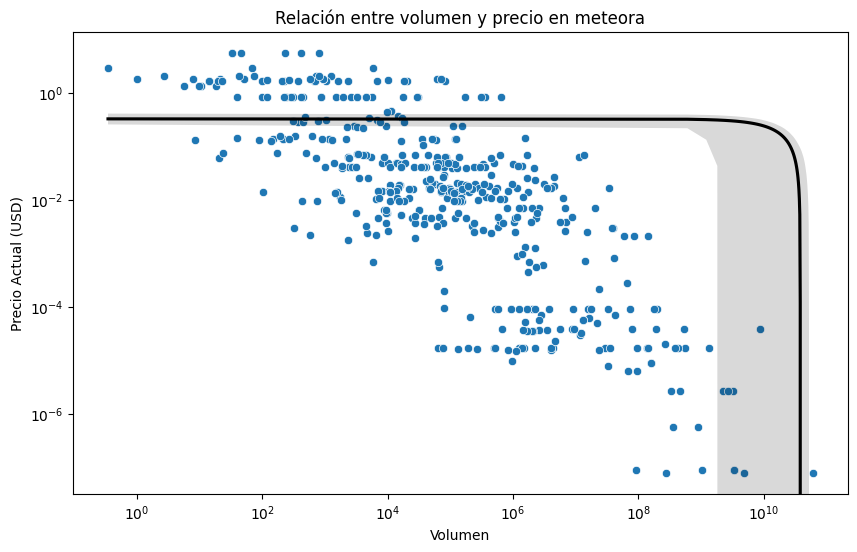

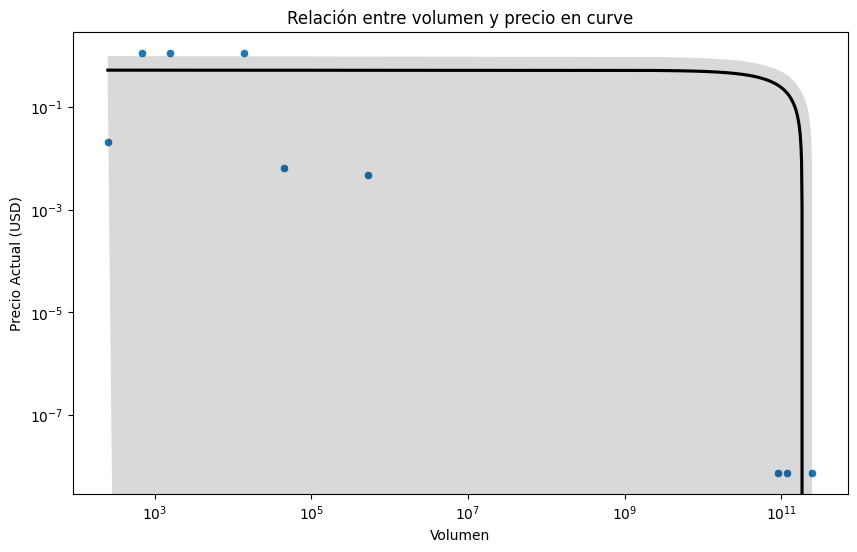

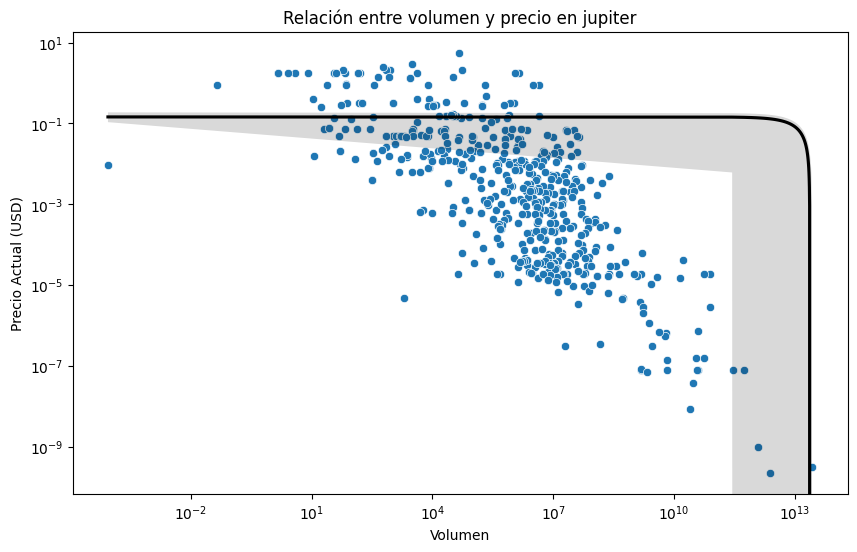

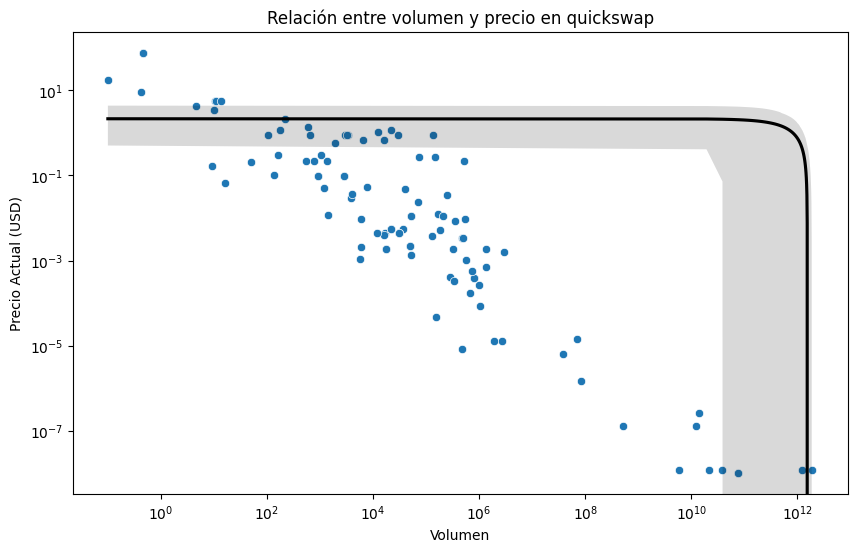

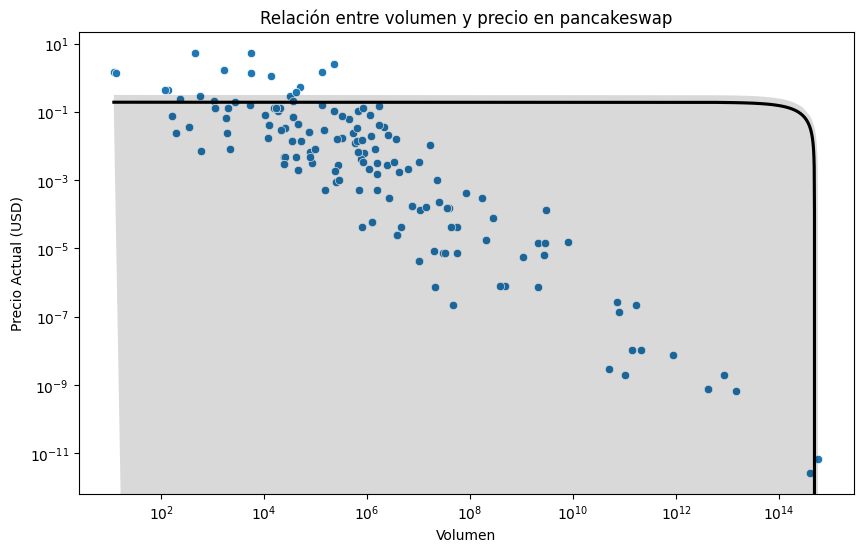

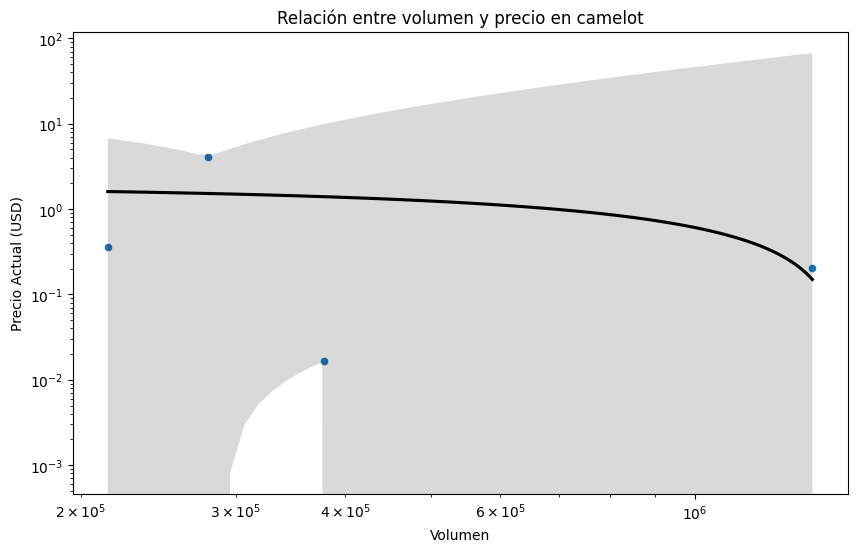

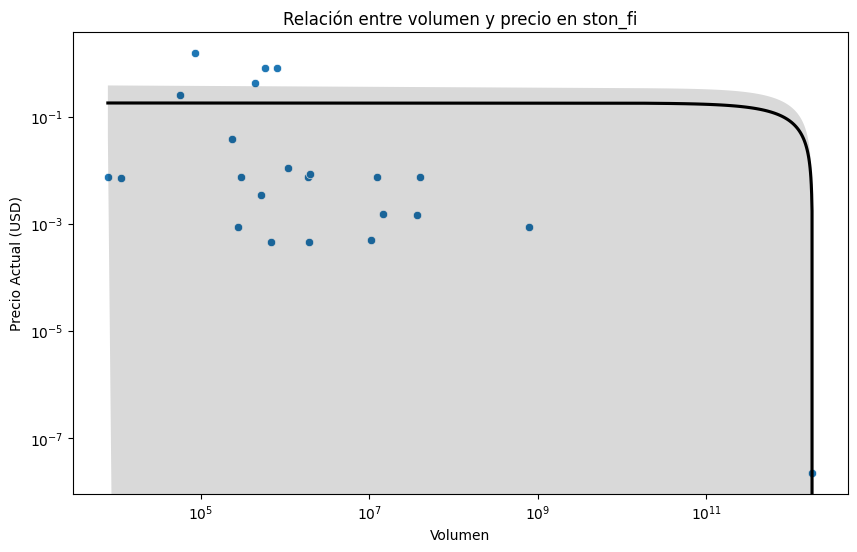

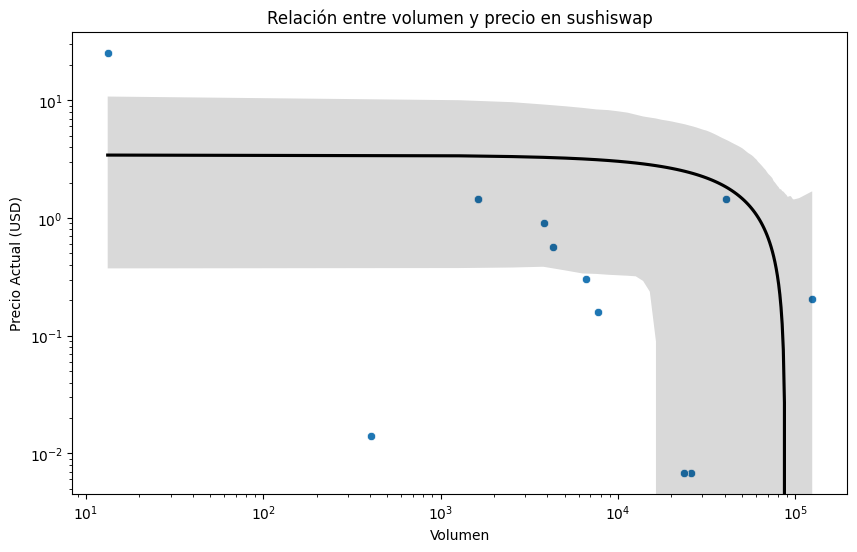

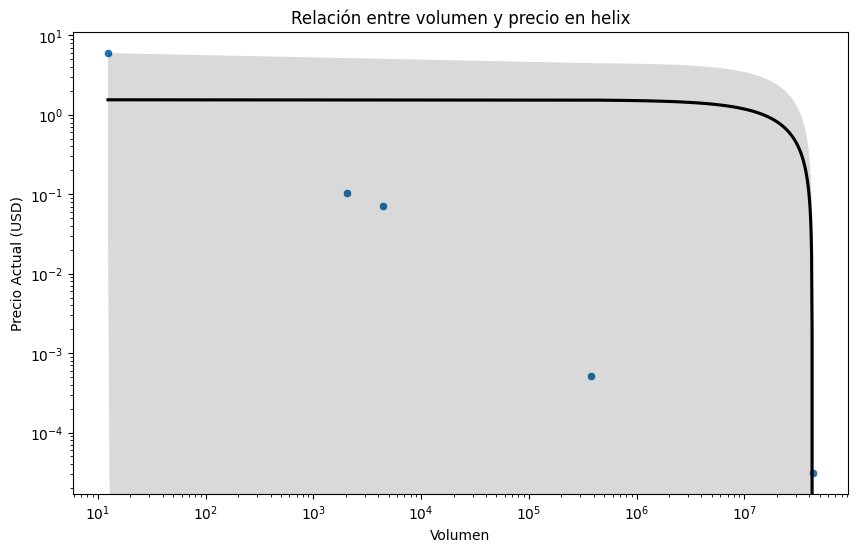

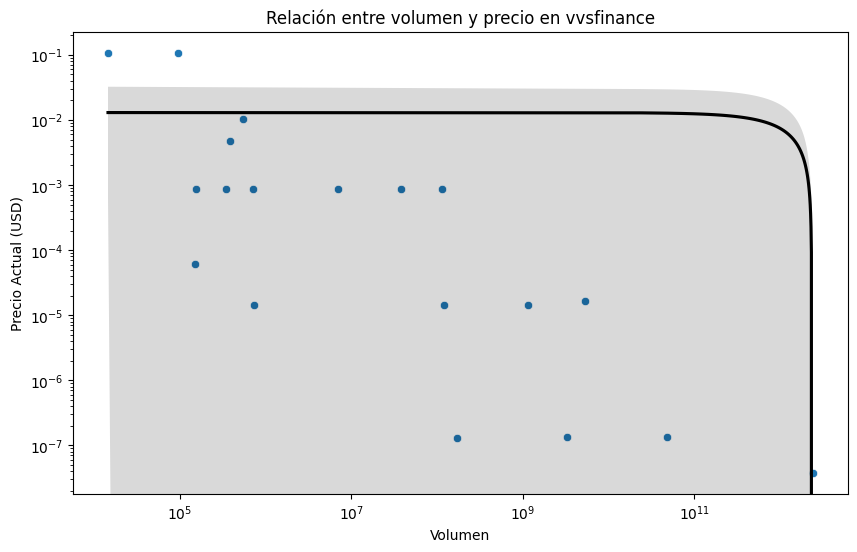

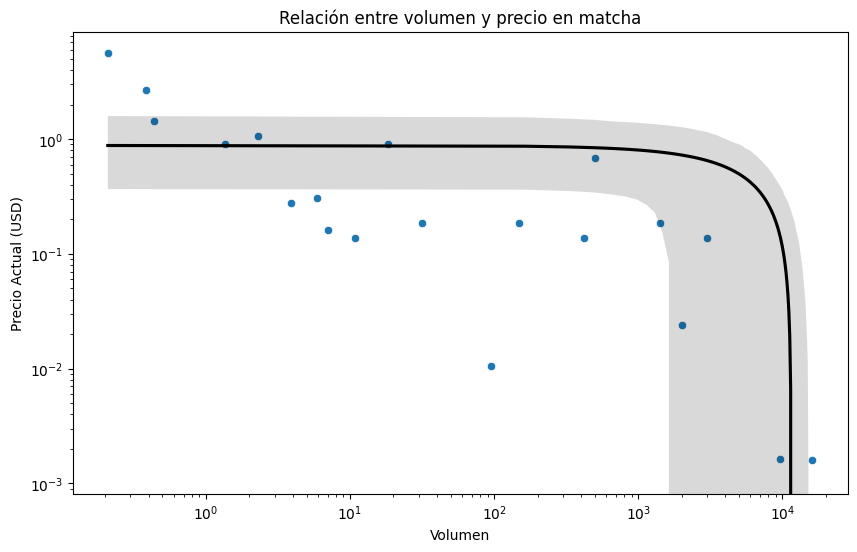

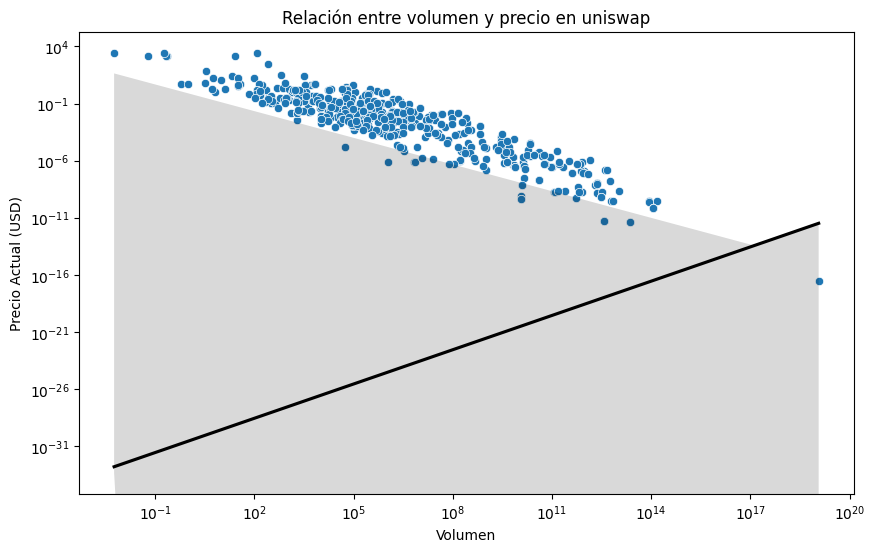

In [ ]:
for ex in exchanges:
    plt.figure(figsize=(10, 6))
    filtered_data = data[data['Exchange'] == ex]
    sns.scatterplot(x='Volume', y='Current Price (USD)', data=filtered_data)
    sns.regplot(x='Volume', y='Current Price (USD)', scatter=False, color='black', data=filtered_data)

    plt.title(f'Relación entre volumen y precio en {ex}')
    plt.xlabel('Volumen')
    plt.ylabel('Precio Actual (USD)')
    plt.xscale('log')
    plt.yscale('log')

    plt.show()

#### Identificamos la clusterizacion de activos por volumen, precio y volatilidad

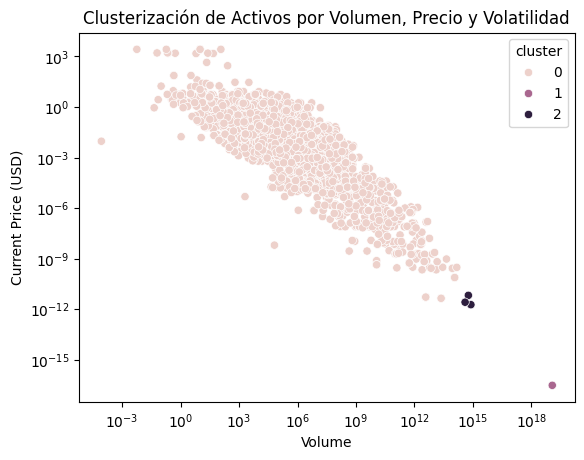

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(data[['Volume', 'Current Price (USD)', 'Volatilidad']])
sns.scatterplot(x='Volume', y='Current Price (USD)', hue='cluster', data=data)
plt.xscale('log')
plt.yscale('log')
plt.title('Clusterización de Activos por Volumen, Precio y Volatilidad')
plt.show()


In [117]:
rclusters = data.groupby('cluster').agg({
    'Current Price (USD)': ['mean', 'min', 'max'],
    'Volume': ['mean', 'min', 'max'],
    'Volatilidad': ['mean', 'min', 'max']
})

print(rclusters)

        Current Price (USD)                                    Volume  \
                       mean           min           max          mean   
cluster                                                                 
0              9.182872e+00  4.468000e-12  2.629390e+03  3.339264e+11   
1              3.100000e-17  3.100000e-17  3.100000e-17  1.166513e+19   
2              3.747000e-12  1.882000e-12  6.720000e-12  5.850781e+14   

                                    Volatilidad                          
                  min           max        mean        min          max  
cluster                                                                  
0        8.700000e-05  1.477102e+14   38.524008   0.000000  3247.002006  
1        1.166513e+19  1.166513e+19   36.691527  36.691527    36.691527  
2        3.940671e+14  7.815470e+14   34.787982  14.191439    53.680352  


In [119]:
bajp_precio_av = data[data['cluster'] == 2]
bajp_precio_av = bajp_precio_av.sort_values(by='Current Price (USD)')
ko = bajp_precio_av[['Token', 'Categories','Current Price (USD)', 'Volume']]
print(ko)

          Token Categories  Current Price (USD)        Volume
701     solpaca       Meme         1.882000e-12  7.815470e+14
2730   oggy-inu       Meme         2.639000e-12  3.940671e+14
2687  baby-grok       Meme         6.720000e-12  5.796201e+14


En este grafico estamos agrupando los tokens segun ciertas caracteristicas, el cluster 0 tienen volumen intermedios y precio alto. Mientras que el cluster 1
tienen volumen alto y precio bajo, el cluster 2 tiene alto volumen y bajo precio.